# Оценка качества моделей (Decision Trees, Linear Regression) на анализе данных Dataset Boston из библиотеки sklearn.

Проведем небольшое исследование. Будем измерять качество моделей Decision Tree и Linear Regression на данных датасета Boston.

## Quality metrics (метрики качества)
В связи с тем, что в датасете целевая переменная - это стоимость жилья в зависимости от некоторых факторов, то нашей задачей по прогнозированию целевой переменной является задача регрессии. В таком случае, логично определить в качестве основной метрики качества - **standard deviation (среднекватратичное отклонение)**.

## Quality assessment space (пространство для оценки качества)
Качество мы будем замерять как на обучающей выборке, так и на тестовой. Подходы для формирования обучающей и тестовой выборки:
1) простое разделение в соотношение 70 на 30
2) простое разделение в соотношении 65 на 35
3) разделение 70 на 30 с кросс-валидацией на 5 фолдов
4) разделение 70 на 30 с кросс-валидацией на 10 фолдов
5) разделение 65 на 35 с кросс-валидацией на 5 фолдов
6) разделение 65 на 35 с кросс-валидацией на 10 фолдов
7) разделение 70 на 30 с кросс-валидцией на 10 фолдов с перемешиванием при разделении выборки
8) разделение 65 на 35 с кросс-валидацией на 10 фолдов с перемешиванием при разделении выборки

Таким образом, для каждой вариации модели мы получим 8 оценок качества. Фиксировать результаты будем в таблицу.

Для визуализации метрики качества при 

## Модели, с помощью которых мы будем строить прогноз:
### Decision Trees:
#### Gradient Boosting:
1) Handmade function

2) GB Regression (sklearn)
###### *Parametres*:
*a) Step length*

*b) Tree depth*

*c) Number of trees*

*d) Feature coverage percent*

*e) Percentage of objects*

*f) Stochastic descend*
#### Random Forest:
1) Random Forest Regressor (sklearn)
###### Parametres:
*a) Tree depth*

*b) Number of trees*

*c) Feature coverage percent*

*d) Percentage of objects*

### Linear Model:
#### Linear Regression:
1) Analitical Solution

2) Handmade function of Gradient Descent

3) Handmade function of Stohastic Gradient Descent

4) LinearRegression (sklearn)

5) Ridge (sklearn)

6) SGD Regressor (sklearn)

###### Parametres:
*a) Step length*

*b) Number of steps*

*c) Regularization L1*

*d) Regularization L2*

*e) ElasticNet (sklearn)*

*f) Polynomial Features*

###### Data requirements:
*a) StandardScaler (sklearn)*

*b) Pearsonr (scipy)*

*c) Box Plot *

*d) Distribution Histogram*

# Импортируем библиотеки

In [1]:
from sklearn import datasets, model_selection, tree, metrics, ensemble, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

# Dataset Boston

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

['filename', 'data', 'target', 'DESCR', 'feature_names']

In [4]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

# Информация о датасете на русском языке
## Датасет стоимости жилья в Бостоне
Каждая запись в базе данных описывает пригород Бостона или город. Данные были взяты из Бостонской стандартной столичной статистической зоны (SMSA) в 1970 году. 
### Характеристики датасета:
1. Количество объектов: 506
2. Количество атрибутов (признаков): 13 (числовых и категориальных)
3. 14-й атрибут - целевой
4. Информация об атрибутах по порядку:

*4.1. CRIM - Уровень преступности на душу населения по пригородам Бостона*

*4.2. ZN - Доля жилой земли зонирована под участки более 25 000 кв. футов*

*4.3. INDUS - Доля неторговых площадей на пригород*

*4.4. CHAS - Фиктивная переменная для реки Чарльз (= 1, если тракт ограничивает реку; 0 в противном случае)*

*4.5. NOX - Концентрация оксидов азота (частей на 10 миллионов)*

*4.6. RM - Среднее количество комнат в доме*

*4.7. AGE - Доля домов домовладельцев, построенных до 1940 года*

*4.8. DIS - Взвешенные расстояния до пяти бостонских центров занятости*

*4.9. RAD - Индекс доступности к радиальным магистралям*

*4.10. TAX -  Ставка налога на полную стоимость имущества на каждые 10 000 долл. стоимости*

*4.11. PTRATIO - Соотношение учеников и учителей по пригородам*

*4.12. B - $1000(Bk - 0,63)^2$ где $Bk$ - доля чернокожих в пригороде*

*4.13. LSTAT - Процент населения с низким статусом*

*4.14. MEDV - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов США*

5. Пропущенные значения атрибутов отсутствуют
6. Авторы: Harrison, D. and Rubinfeld, D.L.
7. Источник: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
8. и др.сведения

Преобразуем данные датасета в формат pandas для того, чтобы удобнее было визуально ознакомится с данными

In [5]:
# занесем данные датасета в таблицу
boston_table = pd.DataFrame(boston.data)

# переименнуем заголовки таблицы в соответствии с их обозначениями
# 1. Создадим словарь названий столбцов признаков
columns = {}

for i in range(13):
    col_i = {i:boston.feature_names[i]}
    columns.update(col_i)

# 2. Переименуем столбцы признаков
boston_table.rename(columns=columns, inplace=True)

# 3. Занесем в таблицу столбец целевых значений
boston_table['Target: MEDV'] = boston.target

boston_table.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target: MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Пропущенные значения
Проверим на наличие пропущенных значений (по условию таковых быть не должно)

In [6]:
boston_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM            506 non-null float64
ZN              506 non-null float64
INDUS           506 non-null float64
CHAS            506 non-null float64
NOX             506 non-null float64
RM              506 non-null float64
AGE             506 non-null float64
DIS             506 non-null float64
RAD             506 non-null float64
TAX             506 non-null float64
PTRATIO         506 non-null float64
B               506 non-null float64
LSTAT           506 non-null float64
Target: MEDV    506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [7]:
boston_table.isnull().sum()

CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
Target: MEDV    0
dtype: int64

Пропусков в данных нет
# Визуализация
Построим **графики зависимости целевого признака от остальных**

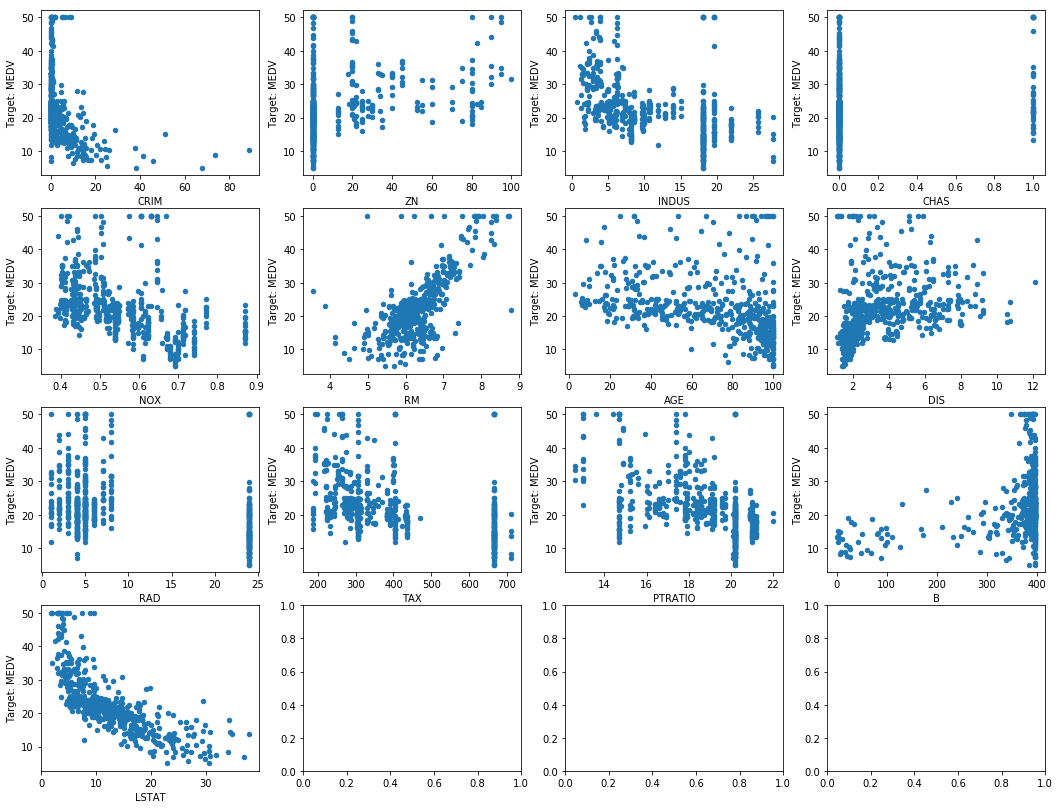

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 14))
for idx, feature in enumerate(boston_table.columns[:-1]):
    boston_table.plot.scatter(feature, "Target: MEDV", subplots=True, ax=axes[idx / 4, idx % 4])

На первый взгляд не все признаки информативны, и всего два признака имеют ярко выраженную линейную зависимость.
Вероятно, для решения этого задания, следует провести кластеризацию объектов, однако пока данную тему мы не разбирали, поэтому обойдемся без кластеризации.
Давайте посмотрим на **коэффициенты корреляции**

In [9]:
corrs = boston_table.corr()

corrs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target: MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Таблица корреляции более наглядно показывает слабую линейную зависимость между признаками и целевым признаком. 
Более того мы видим, что между некоторыми признаками существует линейная зависимость более сильная нежели с целевым признаком.

Однако в наши планы не входило менять сами данные для анализа.

Изучим **диаграммы распределения**

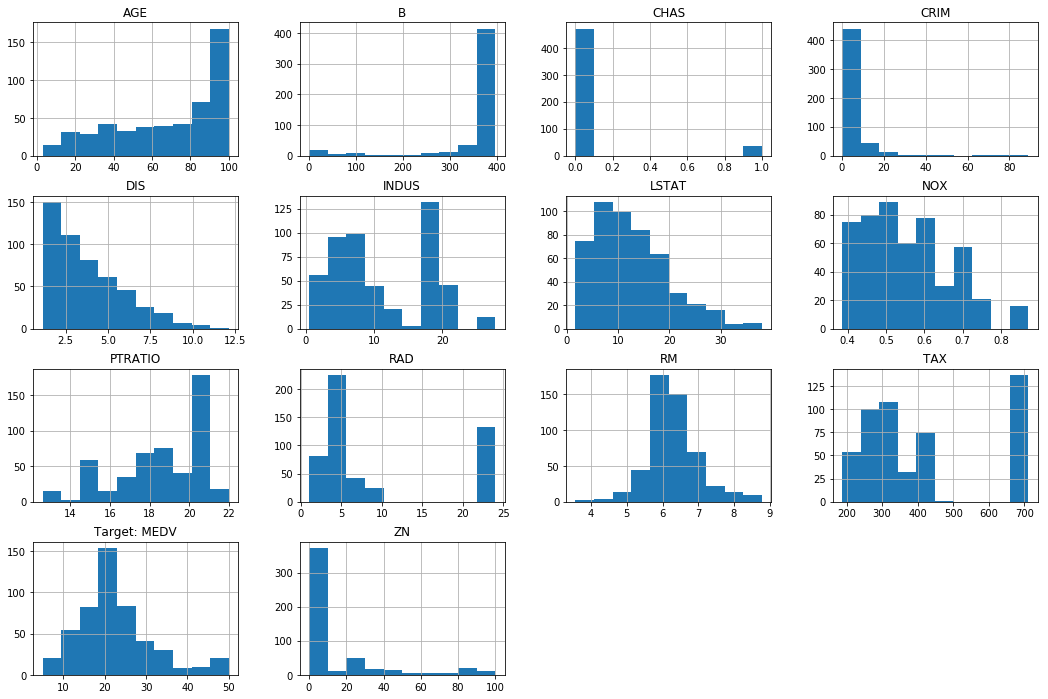

In [10]:
# воспользуемся средствами визуализации pandas
boston_table.hist(figsize=(18,12))
plt.show()

Целевой признак - средняя стоимость дома, имеет распределение близкое к нормальному. Это указывает нам на возможность использования моделей, для прогнозирования значений целевой переменной, в которых в качестве функции потерь применяется метод наименьших квадратов.

Посмотрим на **ящик с усами** данных целевого признака

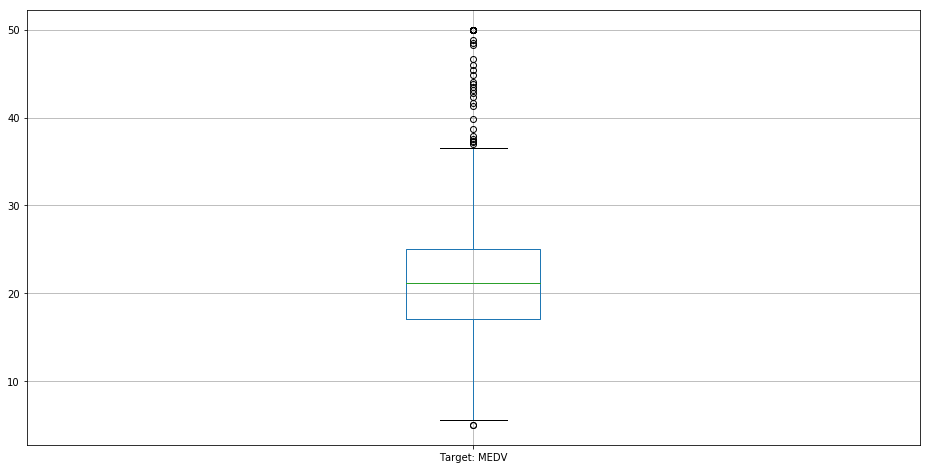

In [11]:
# воспользуемся средствами визуализации pandas 
# (так как series не имеет возможности строить boxplot, то мы приделаем в этот раз костыли)
for_box_plot = pd.DataFrame(boston_table['Target: MEDV'])
for_box_plot.boxplot(figsize=(16,8))
plt.show()

Мы наблюдаем достаточное большое количество выбросов - объекты стоимостью более 35.000$

Давайте посмотрим на эти объекты

In [12]:
print 'Numbers of objects:', boston_table[boston_table['Target: MEDV'] > 35].count()[0]

Numbers of objects: 48


In [13]:
boston_table[boston_table['Target: MEDV'] > 35].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target: MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59,41.3


Давайте посмотрим на графики зависимости целевых признаков от остальных без объектов стоимостью свыше 35.000$

Мы хотим посмотреть будет ли внешне заметным изменение

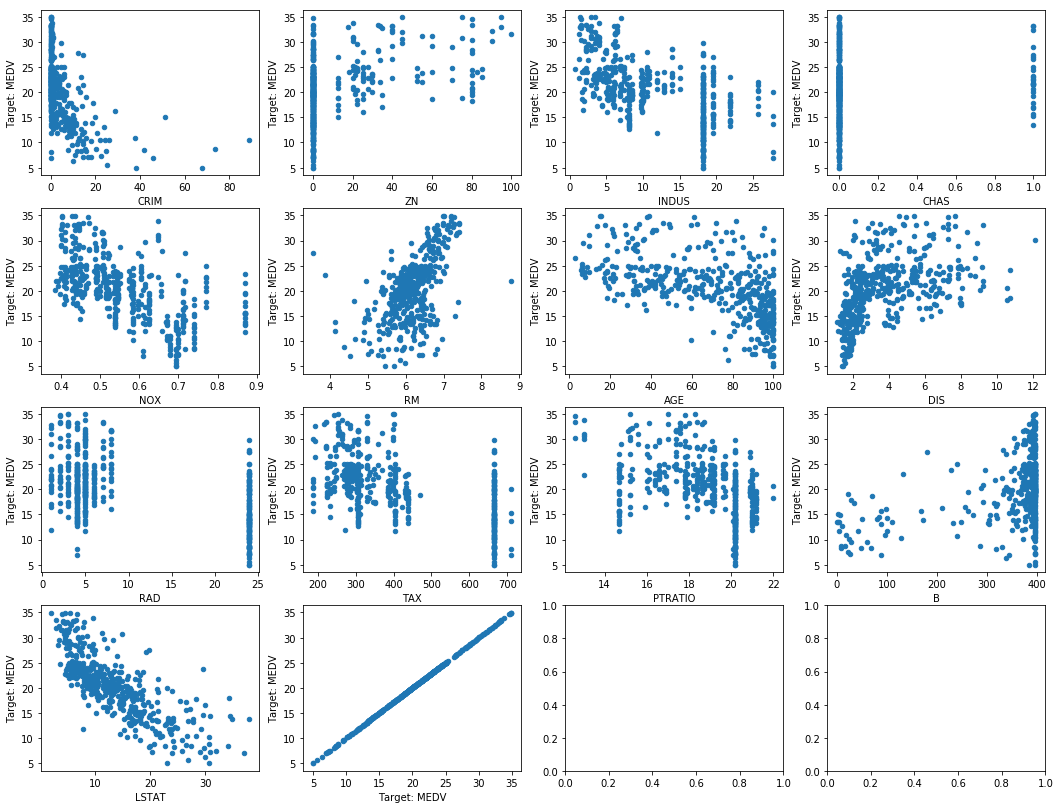

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 14))
for idx, feature in enumerate(boston_table[boston_table['Target: MEDV'] < 35]):
    boston_table[boston_table['Target: MEDV'] < 35].plot.scatter(
        feature, "Target: MEDV", subplots=True, ax=axes[idx / 4, idx % 4])

Серьезных изменений на графиках мы не увидели

Двигаемся дальше. 
# Переведем данные в формат numpy.
Так удобнее будет их обрабатывать.

In [15]:
# переведем в массив numpy признаки
x_data = np.array(boston_table[boston_table.columns[:-1]])
x_data.shape

(506L, 13L)

In [16]:
# переведем в массив numpy целевой признак
y = np.array(boston_table[boston_table.columns[-1]])
print y.shape
y = y.reshape(x_data.shape[0], 1)
print y.shape

(506L,)
(506L, 1L)


# Разобьем выборку на обучающую и тестовую
Разбивать будем в соотношении 70 на 30 с использованием псевдослучайного отбора объектов (опция по умолчанию).

На тестовой выборке качество будем замерять при кросс-валидации на 10 фолдов

In [17]:
# разобьем выборку
(x_train, x_test, y_train, y_test) = model_selection.train_test_split(x_data, y, random_state = 1, test_size = 0.3)

# укажем количество фолдов для последующей кросс-валидации
cv = 10

# Масштабирование признаков 

In [18]:
scale = preprocessing.StandardScaler()

x_train_scale = scale.fit_transform(x_train)

x_test_scale = scale.transform(x_test)

In [19]:
x_train = x_train_scale

x_test = x_test_scale

Переходим собственно к анализу. Нормализацию данных мы выполним чуть позже, результаты сравним.

# Decision Trees: Gradient Boosting
## Handmade function

## Gradient Boosting Regressor

### Без использования случайного выбора признаков

In [20]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество деревьев
list_trees = [1, 10, 50, 100, 250, 500]
# укажем глубину каждого дерева
list_depth = [1, 3, 5, 7, 10]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for tree in list_trees:
    for depth in list_depth:
        model = ensemble.GradientBoostingRegressor(
            learning_rate = 0.01, max_depth = depth, n_estimators = tree, random_state = 1)
        model_fit = model.fit(x_train, y_train)
        mse_test_cv = model_selection.cross_val_score(model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
        mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
        mse_test_cv.append(round(np.mean(mse_test_cv), 3))
        GBR_metrics_cv_table[tree, depth] = mse_test_cv
        y_predict = model_fit.predict(x_test)
        mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
        GBR_metrics_noncv_table[tree, depth] = [mse_test_noncv]

C:\Users\Alexander\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(1, 1)","(1, 3)","(1, 5)","(1, 7)","(1, 10)","(10, 1)","(10, 3)","(10, 5)","(10, 7)","(10, 10)",...,"(250, 1)","(250, 3)","(250, 5)","(250, 7)","(250, 10)","(500, 1)","(500, 3)","(500, 5)","(500, 7)","(500, 10)"
0,4.363,4.351,4.352,4.343,4.340,4.347,4.225,4.211,4.167,4.103,...,3.857,3.391,3.069,3.071,3.427,3.785,3.118,2.948,3.052,3.528
1,10.814,10.796,10.776,10.775,10.779,10.299,10.073,9.963,9.971,9.979,...,4.304,2.854,2.875,3.104,2.931,2.980,2.363,2.518,2.743,2.568
2,12.553,12.518,12.530,12.524,12.521,11.938,11.605,11.654,11.635,11.581,...,5.283,4.142,4.260,4.314,4.498,4.414,3.913,3.859,3.995,4.242
3,9.741,9.706,9.693,9.687,9.687,9.319,8.985,8.955,8.887,8.862,...,4.661,4.765,4.748,4.911,4.926,3.661,4.501,4.815,5.171,5.166
4,10.832,10.814,10.808,10.817,10.805,10.322,10.175,10.147,10.113,10.103,...,6.086,5.318,5.526,6.180,6.389,5.773,4.903,5.249,6.116,6.482
5,9.452,9.437,9.434,9.440,9.438,8.801,8.650,8.616,8.645,8.661,...,3.720,3.197,2.942,2.583,2.695,3.106,3.188,3.110,2.618,2.714
6,9.535,9.492,9.485,9.488,9.484,9.155,8.753,8.682,8.719,8.712,...,4.516,3.352,3.164,3.478,4.193,3.250,3.081,3.044,3.527,4.406
7,11.917,11.912,11.914,11.925,11.910,10.993,10.963,11.015,11.009,10.973,...,4.727,4.271,4.249,4.205,4.314,4.323,4.103,4.046,4.171,4.325
8,5.827,5.814,5.806,5.809,5.808,5.545,5.407,5.347,5.371,5.373,...,2.942,1.911,1.935,1.938,2.078,2.452,1.709,1.868,1.866,2.073
9,7.540,7.513,7.512,7.517,7.525,7.082,6.813,6.840,6.849,6.855,...,3.220,2.936,3.152,3.203,2.954,3.174,3.066,3.419,3.491,3.197


In [22]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(1, 1)","(1, 3)","(1, 5)","(1, 7)","(1, 10)","(10, 1)","(10, 3)","(10, 5)","(10, 7)","(10, 10)",...,"(250, 1)","(250, 3)","(250, 5)","(250, 7)","(250, 10)","(500, 1)","(500, 3)","(500, 5)","(500, 7)","(500, 10)"
0,9.555,9.52,9.512,9.509,9.511,9.23,8.919,8.803,8.804,8.794,...,5.067,3.285,3.16,3.093,3.647,4.19,2.796,2.889,2.889,3.547


In [23]:
# напишем функцию для отрисовки графиков
def graph_for_quality(cv_table, non_cv_table):
    # визуализируем результаты тестирования модели с применением кросс-валидации
    # для этого воспользуемся средствами визуализации pandas 
    # (так как series не имеет возможности строить boxplot, то мы приделаем в этот раз костыли)
    for_box_plot = pd.DataFrame(cv_table[:-1])
    for_box_plot.boxplot(figsize=(24,14))

    n = 0
    for i in cv_table.columns:
        n = n + 1

    x = np.array(range(1, n+1)).reshape(n)
    y = np.array(cv_table[-1:]).reshape(n)

    plt.plot(x, y, 'o', color = 'orange', markersize = 12, label = 'Mean quality with CV')

    x = np.array(range(1, n+1)).reshape(n)
    y = np.array(non_cv_table).reshape(n)

    plt.plot(x, y, 'o', color = 'red', markersize = 12, label = 'Quality without CV')


    plt.xlabel('Parametres', size = 18)
    plt.ylabel('Quality', size = 18)
    plt.legend(prop={'size': 20})
    plt.title('Graph: Boxplot CV model quality range, CV model quality range average, model quality without CV', size = 24)
    plt.show()

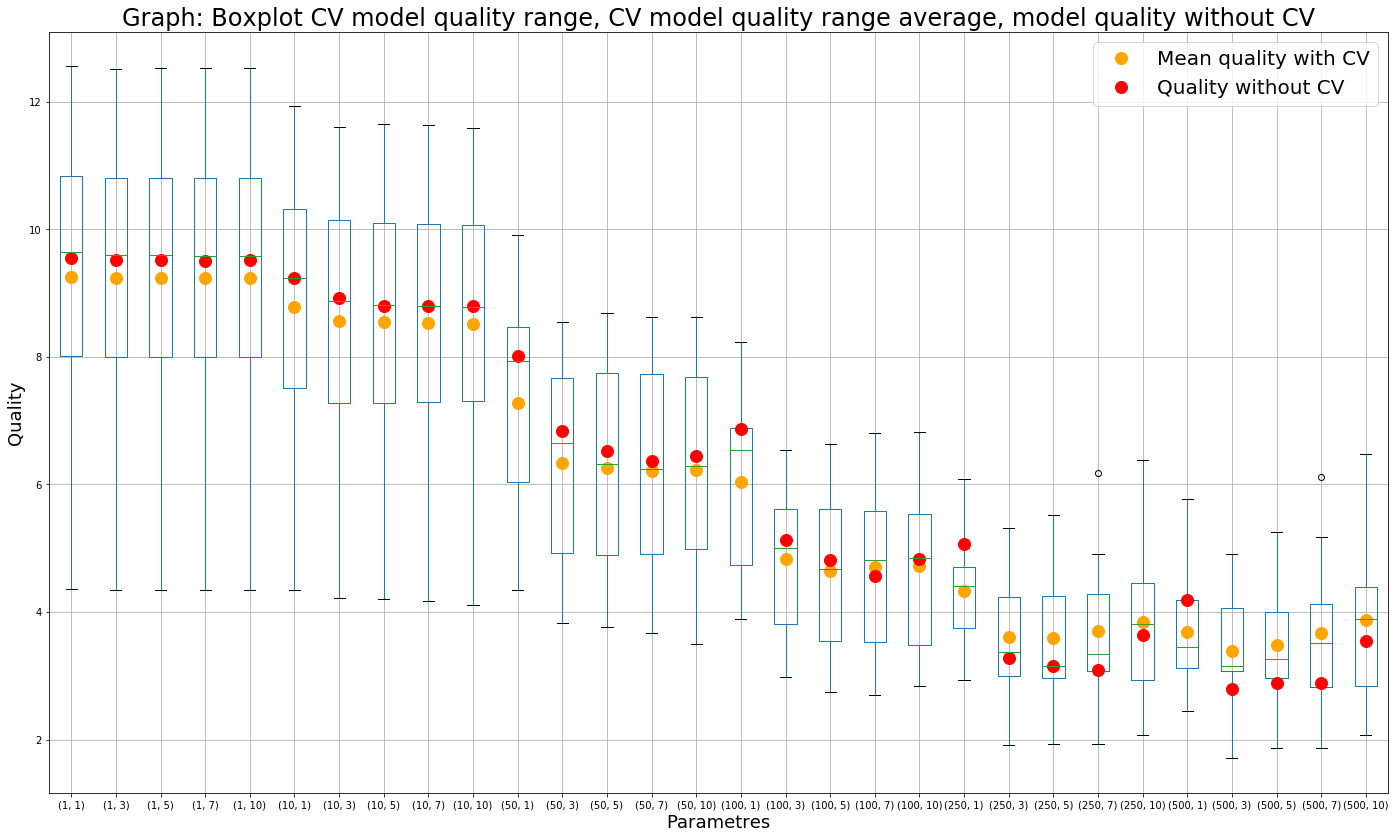

In [24]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Итак, мы наблюдаем следующее:

1) С увеличением роста деревьев, качество модели постоянно растет, хотя разница в результатах между моделью, использующей 250 и 500 деревьев уже не такая существенная, как например разница при использовании 10 и 50 деревьев.

2) С увеличением глубины каждого дерева до 3 или 5 качество модели улучшается, далее качество падает. Похоже на переобучение. Можно проверить на обучающей и тестовой выборке.

Давайте посмотрим будет ли изменяться качество при увеличении количества деревьев. Изменим параметры.

In [25]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество деревьев
list_trees = [500, 1000, 1500, 2500]
# укажем глубину каждого дерева
list_depth = [3, 4]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for tree in list_trees:
    for depth in list_depth:
        model = ensemble.GradientBoostingRegressor(
            learning_rate = 0.01, max_depth = depth, n_estimators = tree, random_state = 1)
        model_fit = model.fit(x_train, y_train)
        mse_test_cv = model_selection.cross_val_score(model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
        mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
        mse_test_cv.append(round(np.mean(mse_test_cv), 3))
        GBR_metrics_cv_table[tree, depth] = mse_test_cv
        y_predict = model_fit.predict(x_test)
        mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
        GBR_metrics_noncv_table[tree, depth] = [mse_test_noncv]

In [26]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(500, 3)","(500, 4)","(1000, 3)","(1000, 4)","(1500, 3)","(1500, 4)","(2500, 3)","(2500, 4)"
0,3.118,3.005,3.031,2.933,3.025,2.913,2.927,2.914
1,2.363,2.418,2.234,2.361,2.241,2.343,2.229,2.371
2,3.913,3.908,3.894,3.885,3.903,3.879,3.903,3.900
3,4.501,5.079,4.508,5.061,4.568,5.062,4.560,5.052
4,4.903,5.260,4.639,5.123,4.575,5.068,4.522,5.053
5,3.188,3.065,3.179,3.107,3.174,3.102,3.242,3.104
6,3.081,2.844,2.974,2.804,2.988,2.819,2.990,2.830
7,4.103,3.672,4.067,3.643,4.071,3.644,4.048,3.651
8,1.709,1.791,1.711,1.811,1.709,1.802,1.743,1.805
9,3.066,3.311,3.139,3.488,3.147,3.501,3.175,3.495


In [27]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(500, 3)","(500, 4)","(1000, 3)","(1000, 4)","(1500, 3)","(1500, 4)","(2500, 3)","(2500, 4)"
0,2.796,2.895,2.665,2.806,2.671,2.817,2.699,2.814


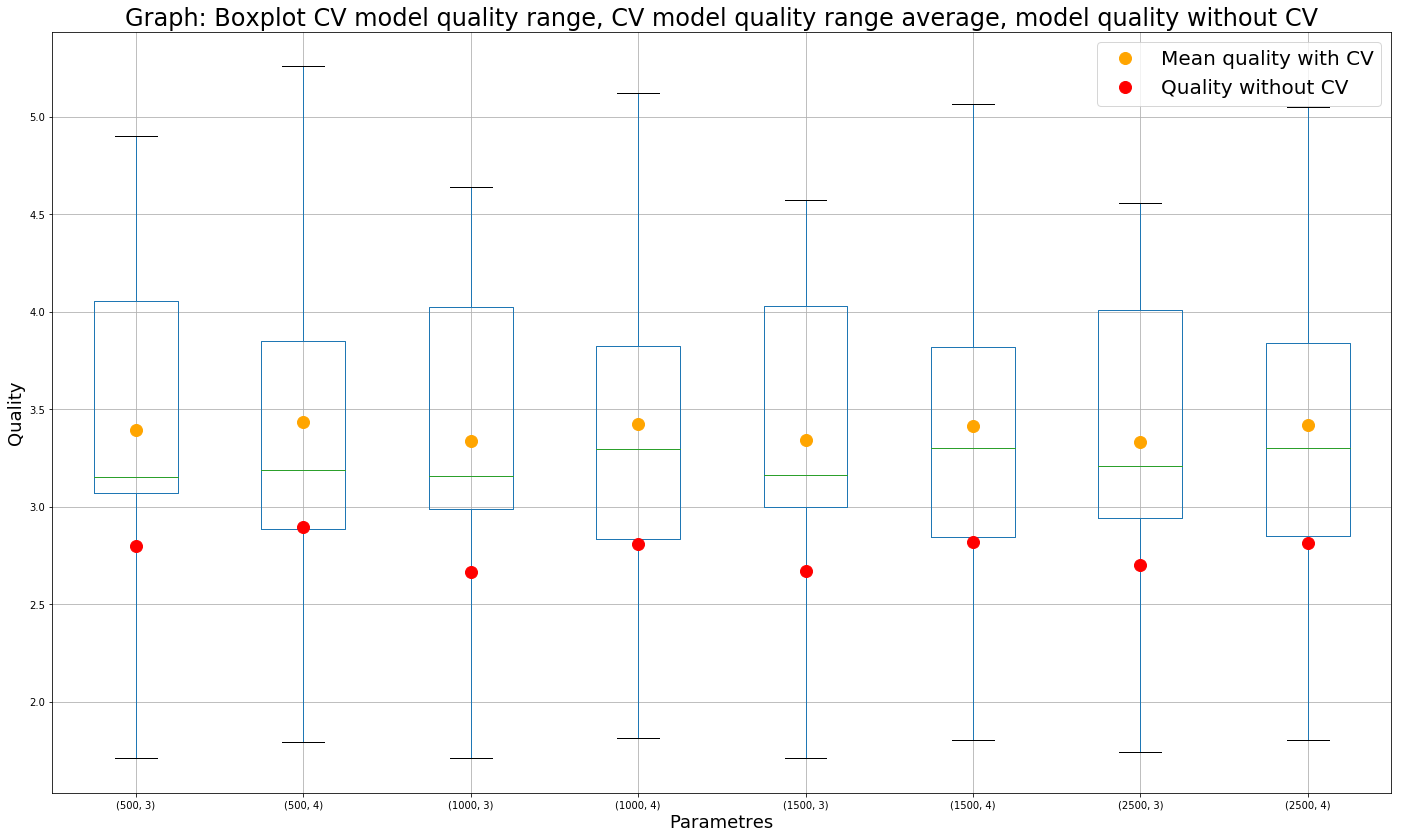

In [28]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Увеличение деревьев более 500 не принесло заметного увеличения качества.

При кросс-валидации лучшие параметры: 2500 деревьев с глубиной 3

Без применения кросс-валидации лучшие параметры: 1000 деревьев с глубиной 3.

Запишем результаты в таблицу

In [29]:
# Создадим и заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)
# создадим пустую таблицу
best_models_table_cv = pd.DataFrame()
# создадим в таблице столбец
best_models_table_cv['GBR'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR
0,2.927
1,2.229
2,3.903
3,4.560
4,4.522
5,3.242
6,2.990
7,4.048
8,1.743
9,3.175


In [30]:
std_dev_best_model_cv = pd.DataFrame()
std_dev_best_model_cv['GBR'] = [round(best_models_table_cv[:-1].std(axis = 0), 3)]
std_dev_best_model_cv

,GBR
0,0.932


In [31]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)
# создадим пустую таблицу
best_models_table_noncv = pd.DataFrame()
# создадим в таблице столбец
best_models_table_noncv['GBR'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR
0,2.665


### При построении каждого дерева отбираем признаки: max_features = 'sqrt'

In [32]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество деревьев
list_trees = [1, 10, 50, 100, 250, 500]
# укажем глубину каждого дерева
list_depth = [1, 3, 5, 7, 10]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for tree in list_trees:
    for depth in list_depth:
        model = ensemble.GradientBoostingRegressor(
            learning_rate = 0.01, max_depth = depth, n_estimators = tree, max_features = 'sqrt', random_state = 1)
        model_fit = model.fit(x_train, y_train)
        mse_test_cv = model_selection.cross_val_score(model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
        mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
        mse_test_cv.append(round(np.mean(mse_test_cv), 3))
        GBR_metrics_cv_table[tree, depth] = mse_test_cv
        y_predict = model_fit.predict(x_test)
        mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
        GBR_metrics_noncv_table[tree, depth] = [mse_test_noncv]

In [33]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(1, 1)","(1, 3)","(1, 5)","(1, 7)","(1, 10)","(10, 1)","(10, 3)","(10, 5)","(10, 7)","(10, 10)",...,"(250, 1)","(250, 3)","(250, 5)","(250, 7)","(250, 10)","(500, 1)","(500, 3)","(500, 5)","(500, 7)","(500, 10)"
0,4.363,4.365,4.368,4.356,4.353,4.195,4.232,4.232,4.206,4.171,...,4.403,4.058,3.416,3.272,3.268,4.567,3.852,3.321,3.290,3.312
1,10.814,10.785,10.794,10.782,10.800,10.400,10.097,10.084,10.029,10.041,...,5.729,3.663,3.262,3.149,3.196,4.176,2.797,2.617,2.642,2.788
2,12.553,12.532,12.529,12.535,12.551,12.082,11.775,11.760,11.804,11.872,...,6.845,5.683,5.493,5.972,5.953,5.495,5.166,4.990,5.485,5.471
3,9.741,9.717,9.712,9.728,9.698,9.384,9.086,9.030,9.044,9.027,...,5.309,3.806,3.563,3.326,3.392,4.194,3.197,3.100,2.955,3.075
4,10.832,10.821,10.822,10.797,10.815,10.438,10.273,10.231,10.102,10.129,...,7.183,5.639,5.870,6.079,5.986,6.666,5.268,5.706,5.960,5.929
5,9.452,9.450,9.445,9.454,9.440,8.961,8.839,8.818,8.860,8.799,...,4.643,3.112,3.099,3.135,3.226,3.584,2.723,2.898,2.886,2.944
6,9.535,9.509,9.491,9.496,9.499,9.175,8.888,8.834,8.769,8.794,...,4.488,2.735,2.623,2.477,2.567,3.045,2.287,2.380,2.277,2.390
7,11.917,11.923,11.912,11.920,11.932,11.326,11.092,11.040,10.950,11.027,...,5.284,3.726,3.353,3.454,3.494,4.289,3.542,3.267,3.403,3.418
8,5.827,5.808,5.812,5.799,5.811,5.526,5.454,5.431,5.354,5.385,...,2.901,2.153,1.920,1.857,1.997,2.767,1.892,1.671,1.677,1.819
9,7.540,7.539,7.506,7.551,7.527,7.148,7.007,6.996,6.939,6.893,...,3.053,2.295,2.237,2.302,2.262,2.202,2.114,2.135,2.181,2.074


In [34]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(1, 1)","(1, 3)","(1, 5)","(1, 7)","(1, 10)","(10, 1)","(10, 3)","(10, 5)","(10, 7)","(10, 10)",...,"(250, 1)","(250, 3)","(250, 5)","(250, 7)","(250, 10)","(500, 1)","(500, 3)","(500, 5)","(500, 7)","(500, 10)"
0,9.553,9.529,9.533,9.515,9.515,9.241,9.026,8.945,8.883,8.857,...,5.552,3.766,3.369,3.297,3.338,4.401,3.037,2.937,2.956,3.045


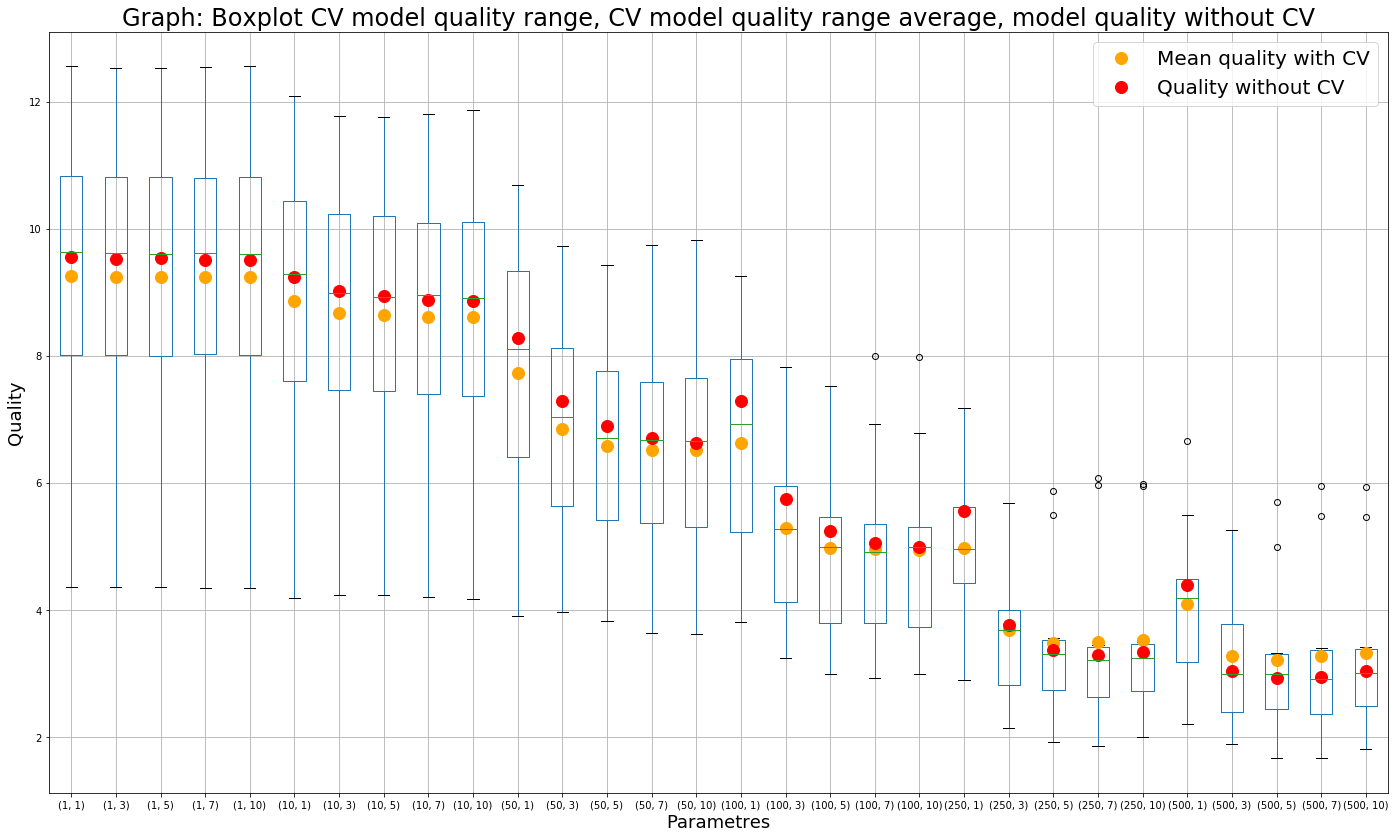

In [35]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Принципиально случайный отбор признаков при каждом новом дереве не изменил качество модели. Однако есть некотороые отличия. Давайте посмотрим на них внимтельнее.

1) На 500 деревьях при увеличении глубины дерева до 10 переобучения не произошло. Возможно это просто случайность???

2) Если посмотреть на разброс значений при кросс-валидации, это видно даже по графикам - он здесь несколько ниже. Но это справедливо только в случае, большой глубины дерева: 7 и 10. Для глубины равной 3 - разброс примерно одинаков.

В связи с тем, что мы наблюдаем улучшение качества модели при увеличении количества деревьев, предлагается провести дополнительные исследования.

In [36]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество деревьев
list_trees = [500, 1000, 1500, 2500]
# укажем глубину каждого дерева
list_depth = [3, 4]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for tree in list_trees:
    for depth in list_depth:
        model = ensemble.GradientBoostingRegressor(
            learning_rate = 0.01, max_depth = depth, n_estimators = tree, max_features = 'sqrt', random_state = 1)
        model_fit = model.fit(x_train, y_train)
        mse_test_cv = model_selection.cross_val_score(model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
        mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
        mse_test_cv.append(round(np.mean(mse_test_cv), 3))
        GBR_metrics_cv_table[tree, depth] = mse_test_cv
        y_predict = model_fit.predict(x_test)
        mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
        GBR_metrics_noncv_table[tree, depth] = [mse_test_noncv]

In [37]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(500, 3)","(500, 4)","(1000, 3)","(1000, 4)","(1500, 3)","(1500, 4)","(2500, 3)","(2500, 4)"
0,3.852,3.434,3.684,3.349,3.613,3.323,3.536,3.292
1,2.797,2.673,2.362,2.465,2.257,2.424,2.197,2.403
2,5.166,5.097,5.138,5.094,5.165,5.118,5.188,5.129
3,3.197,3.198,2.997,3.069,2.939,3.033,2.900,3.018
4,5.268,5.338,5.023,5.237,4.953,5.197,4.930,5.173
5,2.723,2.789,2.703,2.784,2.779,2.804,2.823,2.811
6,2.287,2.268,2.280,2.279,2.306,2.282,2.326,2.299
7,3.542,3.574,3.570,3.586,3.549,3.557,3.485,3.537
8,1.892,1.647,1.763,1.635,1.728,1.652,1.753,1.662
9,2.114,2.125,2.223,2.221,2.315,2.249,2.404,2.274


In [38]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(500, 3)","(500, 4)","(1000, 3)","(1000, 4)","(1500, 3)","(1500, 4)","(2500, 3)","(2500, 4)"
0,3.037,2.918,2.816,2.815,2.779,2.829,2.779,2.832


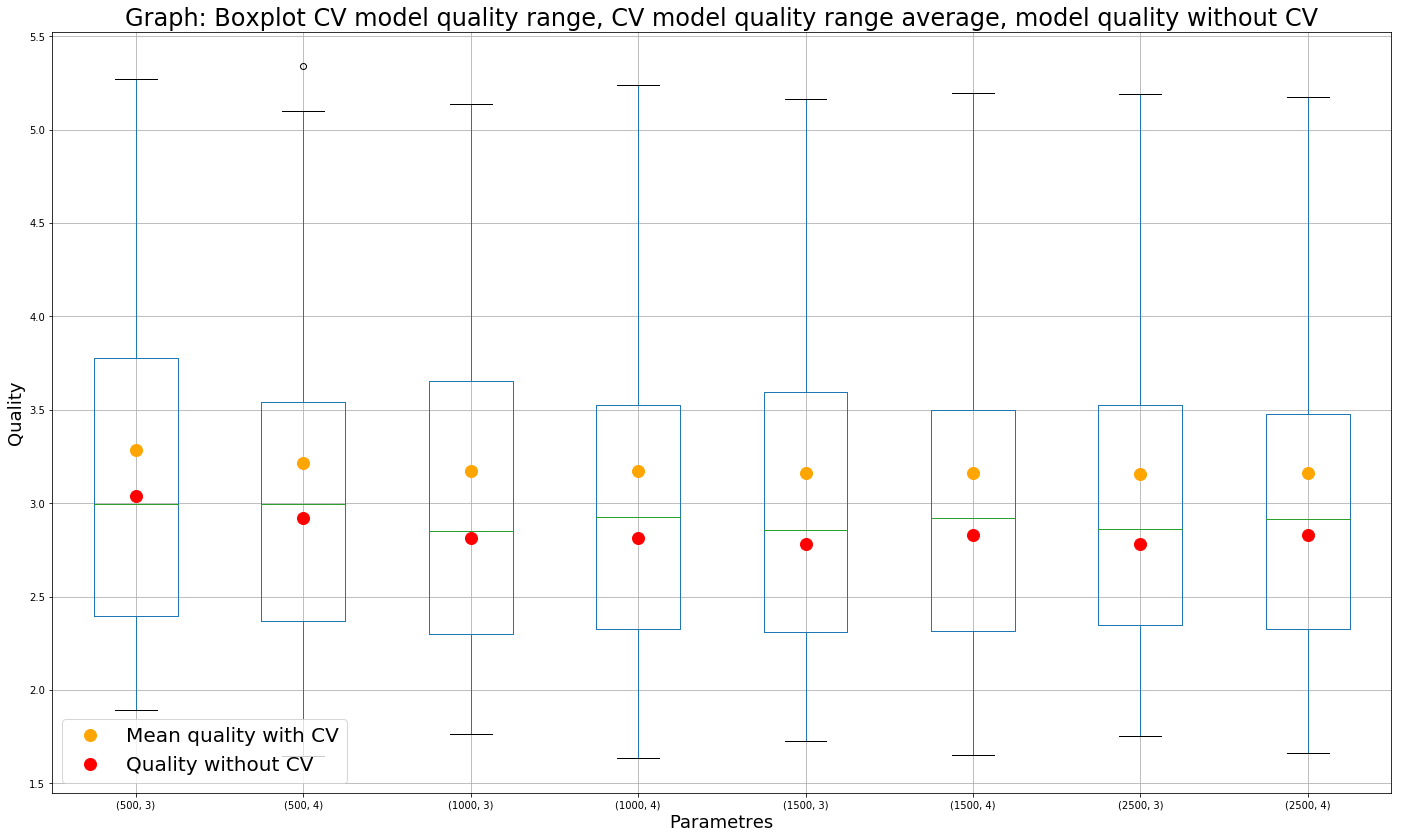

In [39]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Увеличение деревьев более чем 500 не принесло заметного увеличения качества, также как и в прошлый раз. Однако можно заметить, что при использовании всех признаков модель склонна переобучаться при большой глубине, тогда как в модели, использующей признаки псевдослучайными образом, изменение глубины дерева не сильно влияет на переобучение. И тем не менее, переобучение имеется.

При кросс-валидации лучшие параметры: 2500 деревьев с глубиной 3

Без применения кросс-валидации лучшие параметры: 2500 деревьев с глубиной 3.

Запишем результаты в таблицу

In [40]:
# Создадим и заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['GBR_sqrt_f'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f
0,2.927,3.536
1,2.229,2.197
2,3.903,5.188
3,4.560,2.900
4,4.522,4.930
5,3.242,2.823
6,2.990,2.326
7,4.048,3.485
8,1.743,1.753
9,3.175,2.404


Напишем функцию, которая рассчитывает стандартное отклонение оценок качества модели на кросс-валидации

In [41]:
def make_std_dev_table (table_std, table_best_models, name_column):
    table_std[name_column] = [round(table_best_models[name_column][:-1].std(axis = 0), 3)]
    print 'Стандартное отклонение оценок качества лучших моделей на кросс-валидации:'
    return table_std

In [42]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f
0,0.932,1.147


In [43]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['GBR_sqrt_f'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f
0,2.665,2.779


### Стохастический градиентный бустинг

In [44]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество деревьев
list_trees = [500, 1500, 2500]
# укажем глубину каждого дерева
list_depth = [3, 5]
# укажем долю подвыборку для анализа
list_subsamples = [0.7, 0.8, 0.9]


# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for subsample in list_subsamples:
    for tree in list_trees:
        for depth in list_depth:
            model = ensemble.GradientBoostingRegressor(
                learning_rate = 0.01, max_depth = depth, n_estimators = tree, subsample = subsample, random_state = 1)
            model_fit = model.fit(x_train, y_train)
            mse_test_cv = model_selection.cross_val_score(model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
            mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
            mse_test_cv.append(round(np.mean(mse_test_cv), 3))
            GBR_metrics_cv_table[subsample, tree, depth] = mse_test_cv
            y_predict = model_fit.predict(x_test)
            mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
            GBR_metrics_noncv_table[subsample, tree, depth] = [mse_test_noncv]

In [45]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(0.7, 500, 3)","(0.7, 500, 5)","(0.7, 1500, 3)","(0.7, 1500, 5)","(0.7, 2500, 3)","(0.7, 2500, 5)","(0.8, 500, 3)","(0.8, 500, 5)","(0.8, 1500, 3)","(0.8, 1500, 5)","(0.8, 2500, 3)","(0.8, 2500, 5)","(0.9, 500, 3)","(0.9, 500, 5)","(0.9, 1500, 3)","(0.9, 1500, 5)","(0.9, 2500, 3)","(0.9, 2500, 5)"
0,3.419,3.077,3.169,3.004,3.139,3.003,3.359,3.003,3.145,2.935,3.110,2.933,3.276,2.978,3.115,2.902,3.083,2.900
1,2.313,2.408,2.137,2.343,2.151,2.348,2.365,2.465,2.210,2.413,2.222,2.416,2.419,2.599,2.285,2.575,2.303,2.577
2,3.929,3.780,3.850,3.710,3.856,3.710,3.942,3.789,3.939,3.741,3.952,3.739,4.041,3.966,4.053,3.923,4.076,3.923
3,3.510,3.507,3.504,3.556,3.471,3.557,3.727,3.944,3.639,3.961,3.614,3.963,4.288,4.606,4.207,4.600,4.195,4.600
4,5.225,5.337,4.911,5.238,4.866,5.230,5.224,5.356,4.907,5.249,4.858,5.244,4.982,5.279,4.627,5.180,4.567,5.177
5,2.947,2.859,2.891,2.892,2.916,2.899,3.076,3.016,2.971,3.025,2.996,3.029,3.037,2.957,3.005,2.966,3.025,2.969
6,2.640,2.933,2.631,2.897,2.640,2.902,2.726,3.114,2.714,3.088,2.725,3.090,2.860,3.093,2.827,3.063,2.850,3.065
7,4.107,4.475,4.122,4.486,4.121,4.486,4.176,4.691,4.157,4.695,4.168,4.695,4.122,4.514,4.071,4.496,4.063,4.495
8,1.594,1.628,1.664,1.682,1.728,1.685,1.598,1.686,1.710,1.727,1.767,1.729,1.654,1.812,1.709,1.841,1.764,1.841
9,3.504,3.396,3.607,3.416,3.597,3.415,3.261,3.043,3.454,3.073,3.470,3.074,3.186,3.084,3.395,3.132,3.420,3.133


In [46]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(0.7, 500, 3)","(0.7, 500, 5)","(0.7, 1500, 3)","(0.7, 1500, 5)","(0.7, 2500, 3)","(0.7, 2500, 5)","(0.8, 500, 3)","(0.8, 500, 5)","(0.8, 1500, 3)","(0.8, 1500, 5)","(0.8, 2500, 3)","(0.8, 2500, 5)","(0.9, 500, 3)","(0.9, 500, 5)","(0.9, 1500, 3)","(0.9, 1500, 5)","(0.9, 2500, 3)","(0.9, 2500, 5)"
0,2.768,2.783,2.693,2.757,2.707,2.755,2.729,2.754,2.667,2.728,2.694,2.732,2.776,2.778,2.675,2.731,2.687,2.73


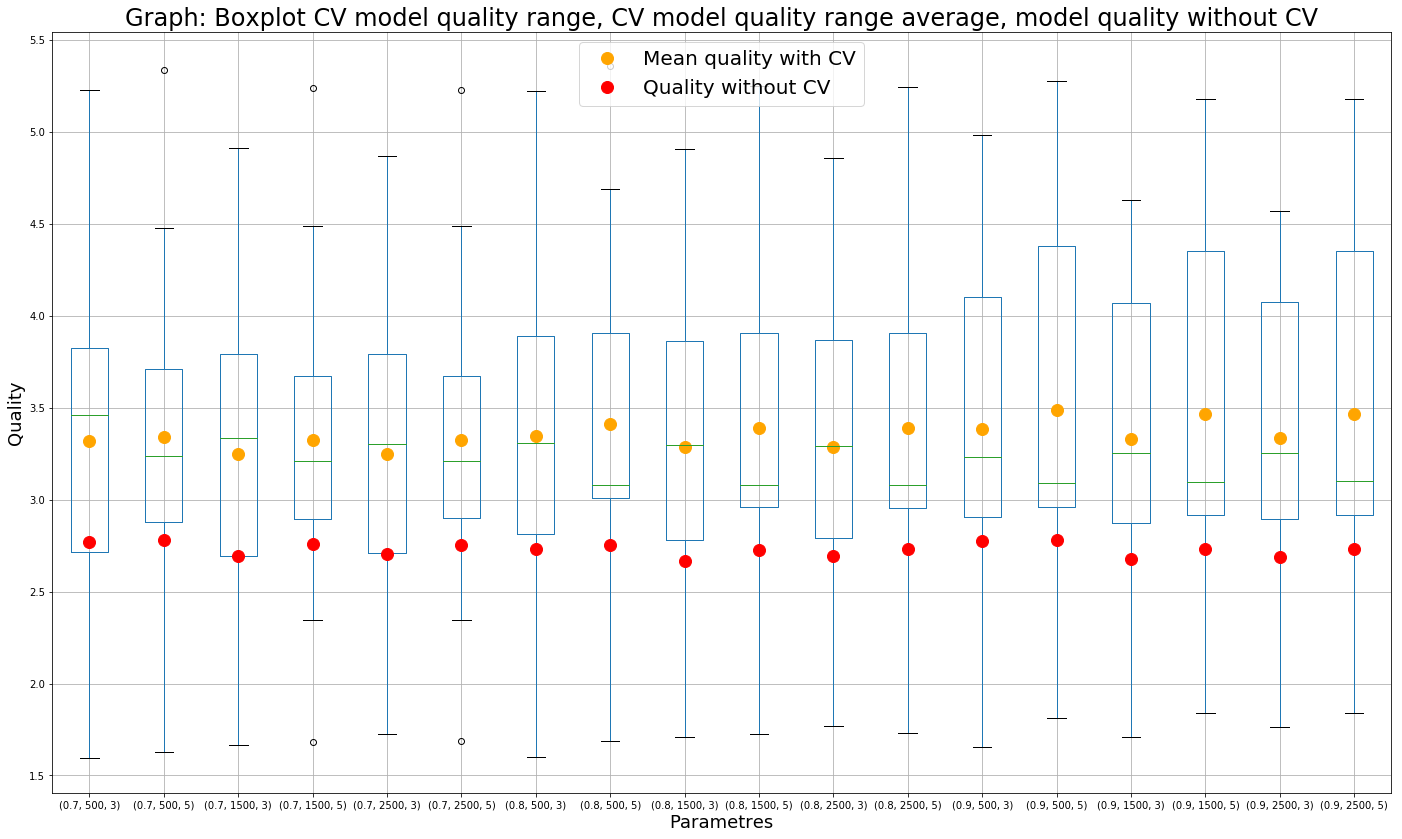

In [47]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Опять-таки существенных изменений в качестве не произошло. Давайте выделим некоторые закономерности.

1) В обоих случаях (с использованием кросс-валидации и без использования) качество при увеличении доли подвыборки незначительно падает

2) При глубине равной 5 качество несколько ниже когда у дерева глубина 3

3) При росте количества деревьев качество слегка увеличивается

Давайте тогда зафиксируем подвыборку на 0.7, глубину на 0.3, а количество деревьев будем увеличивать. Посмотрим сможем ли мы улучшить качество.

In [48]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество деревьев
list_trees = [3000, 4000, 5000]
# укажем глубину каждого дерева
list_depth = [3]
# укажем долю подвыборку для анализа
list_subsamples = [0.7]


# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for subsample in list_subsamples:
    for tree in list_trees:
        for depth in list_depth:
            model = ensemble.GradientBoostingRegressor(
                learning_rate = 0.01, max_depth = depth, n_estimators = tree, subsample = subsample, random_state = 1)
            model_fit = model.fit(x_train, y_train)
            mse_test_cv = model_selection.cross_val_score(model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
            mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
            mse_test_cv.append(round(np.mean(mse_test_cv), 3))
            GBR_metrics_cv_table[subsample, tree, depth] = mse_test_cv
            y_predict = model_fit.predict(x_test)
            mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
            GBR_metrics_noncv_table[subsample, tree, depth] = [mse_test_noncv]

In [49]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(0.7, 3000, 3)","(0.7, 4000, 3)","(0.7, 5000, 3)"
0,3.132,3.127,3.126
1,2.161,2.177,2.185
2,3.851,3.848,3.846
3,3.470,3.468,3.467
4,4.849,4.839,4.831
5,2.924,2.944,2.952
6,2.649,2.658,2.662
7,4.114,4.113,4.113
8,1.743,1.754,1.759
9,3.600,3.601,3.603


In [50]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(0.7, 3000, 3)","(0.7, 4000, 3)","(0.7, 5000, 3)"
0,2.716,2.728,2.737


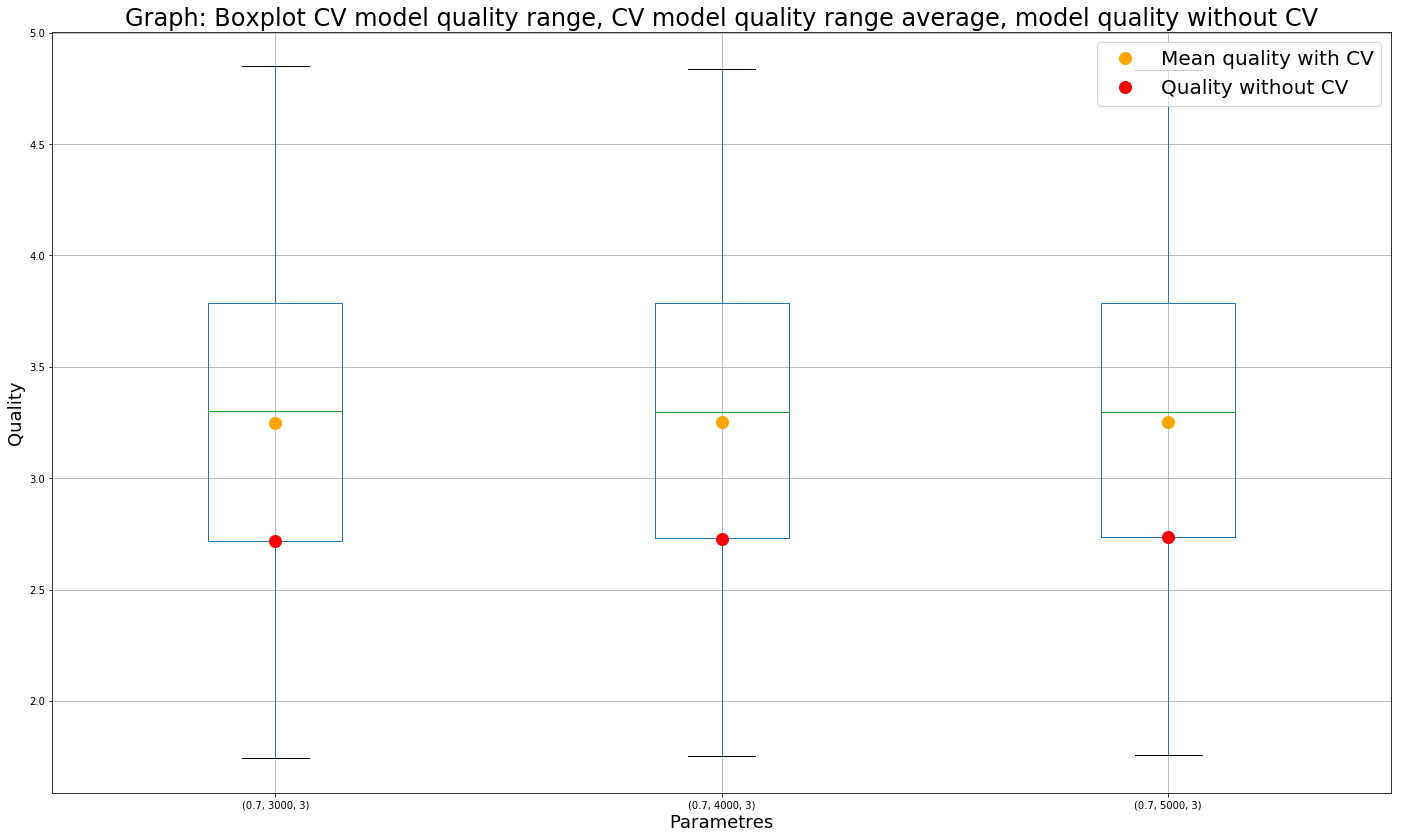

In [51]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

После определенного порога количества деревьев их дальнейший рост приводит к переобучению модели. 
Фиксируем результаты и двигаемся к следующей моделе - Random Forest

In [52]:
# Заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['GBR_stoch'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f,GBR_stoch
0,2.927,3.536,3.132
1,2.229,2.197,2.161
2,3.903,5.188,3.851
3,4.560,2.900,3.470
4,4.522,4.930,4.849
5,3.242,2.823,2.924
6,2.990,2.326,2.649
7,4.048,3.485,4.114
8,1.743,1.753,1.743
9,3.175,2.404,3.600


In [53]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f,GBR_stoch
0,0.932,1.147,0.929


In [54]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['GBR_stoch'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f,GBR_stoch
0,2.665,2.779,2.716


# Decision Trees: Random Forest

In [55]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_features = ['auto']
# укажем количество деревьев
list_trees = [50, 100, 500, 1500]
# укажем глубину каждого дерева
list_depth = [2, 3, 5, 7, 10]



# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for feature in list_features:
    for tree in list_trees:
        for depth in list_depth:
            model = ensemble.RandomForestRegressor(
                max_depth = depth, n_estimators = tree, max_features = feature, random_state = 1)
            model_fit = model.fit(x_train, y_train)
            mse_test_cv = model_selection.cross_val_score(
                model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
            mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
            mse_test_cv.append(round(np.mean(mse_test_cv), 3))
            GBR_metrics_cv_table[feature, tree, depth] = mse_test_cv
            y_predict = model_fit.predict(x_test)
            mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
            GBR_metrics_noncv_table[feature, tree, depth] = [mse_test_noncv]

C:\Users\Alexander\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Alexander\Anaconda2\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [56]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(auto, 50, 2)","(auto, 50, 3)","(auto, 50, 5)","(auto, 50, 7)","(auto, 50, 10)","(auto, 100, 2)","(auto, 100, 3)","(auto, 100, 5)","(auto, 100, 7)","(auto, 100, 10)","(auto, 500, 2)","(auto, 500, 3)","(auto, 500, 5)","(auto, 500, 7)","(auto, 500, 10)","(auto, 1500, 2)","(auto, 1500, 3)","(auto, 1500, 5)","(auto, 1500, 7)","(auto, 1500, 10)"
0,4.512,3.554,3.202,3.055,3.090,4.513,3.574,3.155,3.035,3.057,4.536,3.624,3.185,3.063,3.054,4.535,3.638,3.187,3.084,3.062
1,3.097,2.706,2.547,2.436,2.370,3.084,2.672,2.589,2.483,2.405,3.047,2.683,2.608,2.493,2.437,3.039,2.687,2.614,2.503,2.425
2,3.778,3.716,3.795,3.818,3.904,3.800,3.693,3.840,3.835,3.873,3.705,3.621,3.744,3.735,3.736,3.713,3.644,3.750,3.758,3.750
3,3.858,3.881,3.655,3.609,3.597,3.804,3.841,3.637,3.489,3.560,3.853,3.891,3.579,3.483,3.510,3.892,3.938,3.661,3.569,3.555
4,6.954,6.505,6.298,6.231,6.259,6.929,6.430,6.243,6.114,6.167,6.797,6.371,6.127,6.056,6.042,6.739,6.328,6.081,6.038,6.013
5,3.303,3.252,2.934,3.152,3.249,3.562,3.237,3.052,3.281,3.224,3.506,3.283,3.143,3.178,3.141,3.412,3.179,3.091,3.069,3.049
6,3.642,3.371,3.281,3.241,3.184,3.624,3.283,3.195,3.241,3.172,3.704,3.221,3.088,3.075,3.049,3.617,3.143,3.010,2.975,2.957
7,4.550,4.577,4.240,4.240,4.354,4.361,4.356,4.133,4.167,4.182,4.318,4.186,4.112,4.103,4.113,4.353,4.234,4.182,4.165,4.127
8,3.140,2.111,1.588,1.562,1.588,3.129,2.061,1.651,1.559,1.612,2.976,2.004,1.692,1.634,1.665,2.991,2.016,1.676,1.625,1.617
9,4.666,3.913,3.708,3.729,3.720,4.789,4.146,3.962,4.002,3.876,4.706,4.009,3.860,3.856,3.828,4.676,4.045,3.851,3.853,3.849


In [57]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(auto, 50, 2)","(auto, 50, 3)","(auto, 50, 5)","(auto, 50, 7)","(auto, 50, 10)","(auto, 100, 2)","(auto, 100, 3)","(auto, 100, 5)","(auto, 100, 7)","(auto, 100, 10)","(auto, 500, 2)","(auto, 500, 3)","(auto, 500, 5)","(auto, 500, 7)","(auto, 500, 10)","(auto, 1500, 2)","(auto, 1500, 3)","(auto, 1500, 5)","(auto, 1500, 7)","(auto, 1500, 10)"
0,4.559,3.783,3.19,3.089,3.043,4.43,3.689,3.085,2.948,2.896,4.535,3.801,3.106,2.952,2.894,4.572,3.819,3.122,2.955,2.895


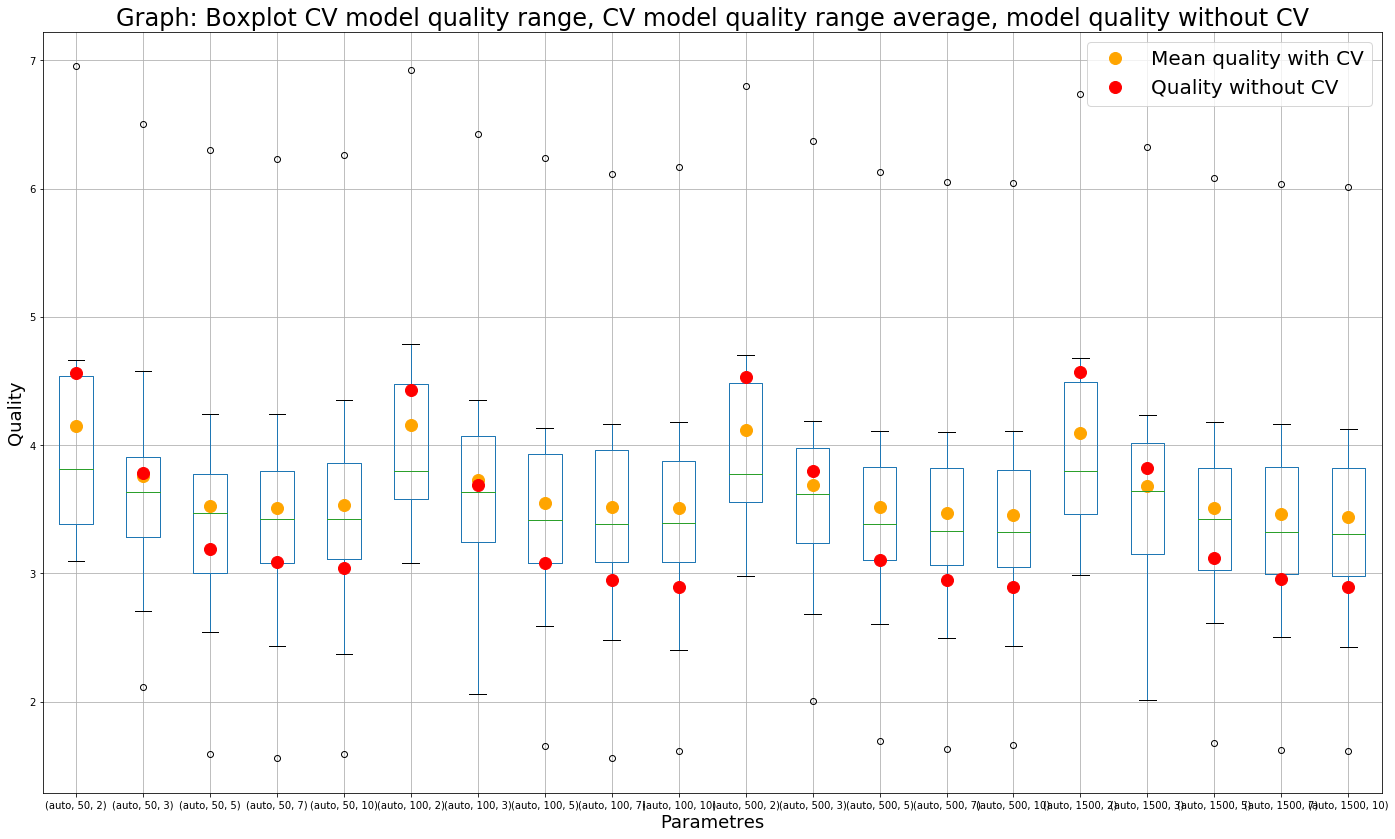

In [58]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Случайный лес при лучших параметрах показывает сопоставимое качество с градиентным бустингом. Однако заметно небольшое отставание по качеству.

Также мы наблюдаем, что с увеличением глубины качество растет достаточно заметно, и слабо выраженый рост при увеличении количества деревьев.

Давайте будем увеличивать этьи два параметра

In [59]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_features = ['auto']
# укажем количество деревьев
list_trees = [1500, 2000, 2500]
# укажем глубину каждого дерева
list_depth = [10, 15, 50]



# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for feature in list_features:
    for tree in list_trees:
        for depth in list_depth:
            model = ensemble.RandomForestRegressor(
                max_depth = depth, n_estimators = tree, max_features = feature, random_state = 1)
            model_fit = model.fit(x_train, y_train)
            mse_test_cv = model_selection.cross_val_score(
                model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
            mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
            mse_test_cv.append(round(np.mean(mse_test_cv), 3))
            GBR_metrics_cv_table[feature, tree, depth] = mse_test_cv
            y_predict = model_fit.predict(x_test)
            mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
            GBR_metrics_noncv_table[feature, tree, depth] = [mse_test_noncv]

C:\Users\Alexander\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [60]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(auto, 1500, 10)","(auto, 1500, 15)","(auto, 1500, 50)","(auto, 2000, 10)","(auto, 2000, 15)","(auto, 2000, 50)","(auto, 2500, 10)","(auto, 2500, 15)","(auto, 2500, 50)"
0,3.062,3.063,3.065,3.070,3.073,3.075,3.064,3.068,3.068
1,2.425,2.438,2.435,2.422,2.430,2.425,2.419,2.426,2.423
2,3.750,3.731,3.731,3.752,3.732,3.731,3.751,3.733,3.734
3,3.555,3.544,3.541,3.543,3.530,3.526,3.534,3.530,3.529
4,6.013,6.020,6.027,6.020,6.030,6.035,6.007,6.022,6.028
5,3.049,3.062,3.067,3.053,3.062,3.062,3.065,3.072,3.071
6,2.957,2.948,2.949,2.970,2.960,2.963,2.973,2.965,2.965
7,4.127,4.138,4.137,4.130,4.108,4.108,4.122,4.106,4.104
8,1.617,1.651,1.651,1.620,1.648,1.648,1.619,1.641,1.641
9,3.849,3.839,3.835,3.822,3.823,3.821,3.887,3.885,3.883


In [61]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(auto, 1500, 10)","(auto, 1500, 15)","(auto, 1500, 50)","(auto, 2000, 10)","(auto, 2000, 15)","(auto, 2000, 50)","(auto, 2500, 10)","(auto, 2500, 15)","(auto, 2500, 50)"
0,2.895,2.876,2.88,2.901,2.884,2.888,2.901,2.887,2.893


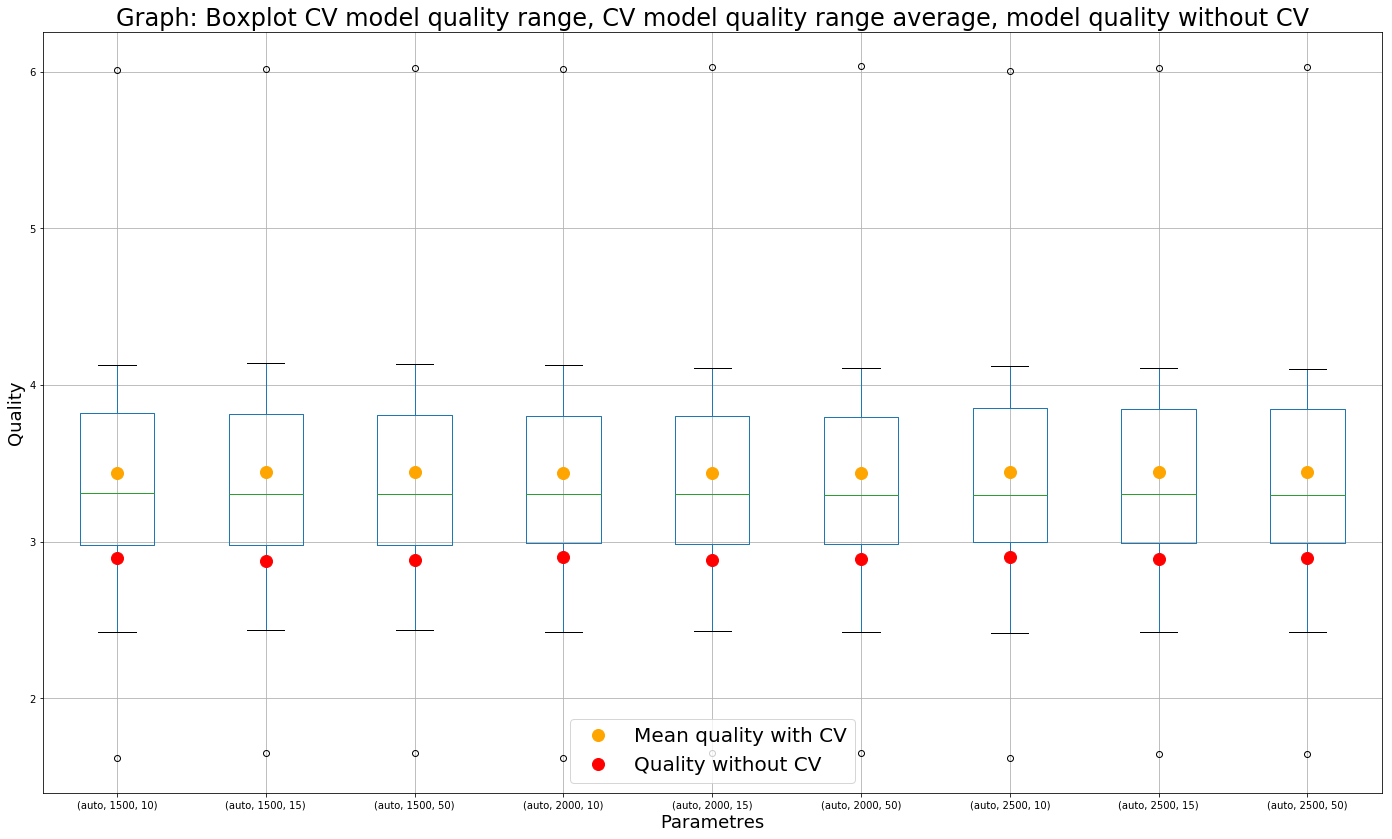

In [62]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Как мы наблюдаем существует порог глубины и деревьев, перешагнув который модель начинает переобучаться. 

Запишем результаты

In [63]:
# Заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['RF'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f,GBR_stoch,RF
0,2.927,3.536,3.132,3.075
1,2.229,2.197,2.161,2.425
2,3.903,5.188,3.851,3.731
3,4.560,2.900,3.470,3.526
4,4.522,4.930,4.849,6.035
5,3.242,2.823,2.924,3.062
6,2.990,2.326,2.649,2.963
7,4.048,3.485,4.114,4.108
8,1.743,1.753,1.743,1.648
9,3.175,2.404,3.600,3.821


In [64]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f,GBR_stoch,RF
0,0.932,1.147,0.929,1.162


In [65]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['RF'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f,GBR_stoch,RF
0,2.665,2.779,2.716,2.876


# Decision Trees: Random Forest with bagging

In [66]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_features = ['sqrt']
# укажем количество деревьев
list_trees = [100, 500, 1500]
# укажем глубину каждого дерева
list_depth = [5, 7, 10]



# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for feature in list_features:
    for tree in list_trees:
        for depth in list_depth:
            model = ensemble.RandomForestRegressor(
                max_depth = depth, n_estimators = tree, max_features = feature, random_state = 1)
            model_fit = model.fit(x_train, y_train)
            mse_test_cv = model_selection.cross_val_score(
                model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
            mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
            mse_test_cv.append(round(np.mean(mse_test_cv), 3))
            GBR_metrics_cv_table[feature, tree, depth] = mse_test_cv
            y_predict = model_fit.predict(x_test)
            mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
            GBR_metrics_noncv_table[feature, tree, depth] = [mse_test_noncv]

C:\Users\Alexander\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [67]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(sqrt, 100, 5)","(sqrt, 100, 7)","(sqrt, 100, 10)","(sqrt, 500, 5)","(sqrt, 500, 7)","(sqrt, 500, 10)","(sqrt, 1500, 5)","(sqrt, 1500, 7)","(sqrt, 1500, 10)"
0,3.595,3.597,3.930,3.816,3.706,3.814,3.853,3.675,3.714
1,3.524,3.241,3.220,3.494,3.225,3.147,3.450,3.166,3.047
2,5.561,5.169,5.327,5.472,5.290,5.435,5.284,5.227,5.260
3,3.729,3.294,3.295,3.684,3.426,3.360,3.636,3.401,3.344
4,6.611,6.005,6.314,6.368,6.380,6.378,6.361,6.425,6.385
5,2.966,2.752,2.999,2.921,2.846,2.904,2.868,2.795,2.897
6,2.583,2.550,2.576,2.441,2.332,2.195,2.414,2.333,2.288
7,3.293,3.056,3.340,3.565,3.324,3.383,3.559,3.369,3.366
8,1.703,1.932,1.615,1.922,1.912,1.750,1.887,1.841,1.792
9,2.636,2.274,2.393,2.595,2.502,2.512,2.544,2.514,2.519


In [68]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(sqrt, 100, 5)","(sqrt, 100, 7)","(sqrt, 100, 10)","(sqrt, 500, 5)","(sqrt, 500, 7)","(sqrt, 500, 10)","(sqrt, 1500, 5)","(sqrt, 1500, 7)","(sqrt, 1500, 10)"
0,3.7,3.394,3.261,3.643,3.279,3.145,3.632,3.29,3.174


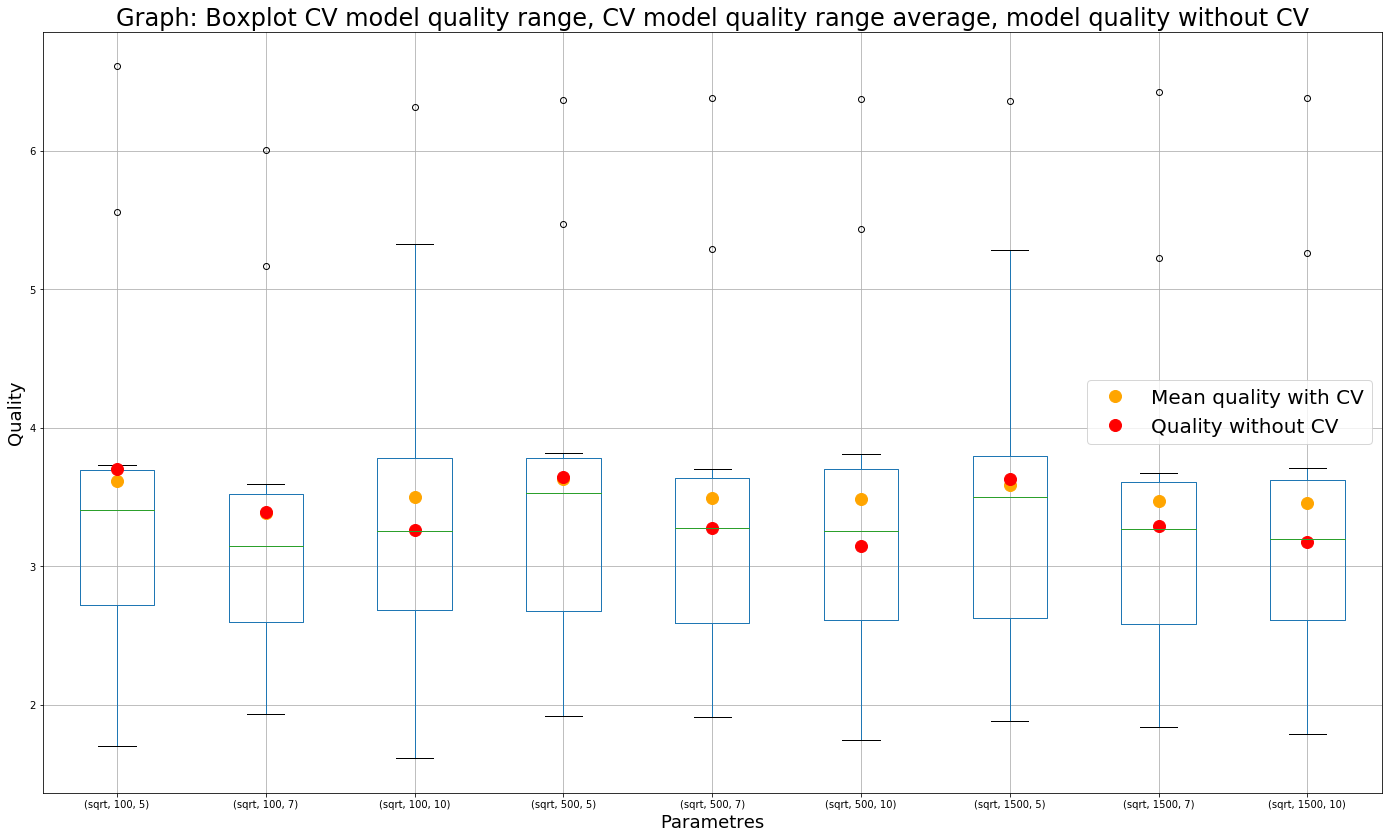

In [69]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Качество заметно ухудшилось, но с увеличением глубины каждого дерева и количества деревьев качество незначительно улучшается. Вряд ли нам удастся сильно улучшить показатели и достичь предыдущего максимума, но мы проведем дополнительное исследование. Увеличим глубину деревьев и их количество.

In [70]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_features = ['sqrt']
# укажем количество деревьев
list_trees = [1500, 2500]
# укажем глубину каждого дерева
list_depth = [10, 25, 50]



# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for feature in list_features:
    for tree in list_trees:
        for depth in list_depth:
            model = ensemble.RandomForestRegressor(
                max_depth = depth, n_estimators = tree, max_features = feature, random_state = 1)
            model_fit = model.fit(x_train, y_train)
            mse_test_cv = model_selection.cross_val_score(
                model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
            mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
            mse_test_cv.append(round(np.mean(mse_test_cv), 3))
            GBR_metrics_cv_table[feature, tree, depth] = mse_test_cv
            y_predict = model_fit.predict(x_test)
            mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
            GBR_metrics_noncv_table[feature, tree, depth] = [mse_test_noncv]

C:\Users\Alexander\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [71]:
# посмотрим на результаты тестирования модели при кросс-валидации
GBR_metrics_cv_table

,"(sqrt, 1500, 10)","(sqrt, 1500, 25)","(sqrt, 1500, 50)","(sqrt, 2500, 10)","(sqrt, 2500, 25)","(sqrt, 2500, 50)"
0,3.714,3.728,3.728,3.671,3.699,3.699
1,3.047,3.046,3.046,3.077,3.090,3.090
2,5.260,5.331,5.331,5.246,5.333,5.333
3,3.344,3.342,3.342,3.338,3.348,3.348
4,6.385,6.341,6.341,6.344,6.292,6.292
5,2.897,2.898,2.898,2.901,2.901,2.901
6,2.288,2.244,2.244,2.323,2.257,2.257
7,3.366,3.359,3.359,3.349,3.334,3.334
8,1.792,1.860,1.860,1.809,1.855,1.855
9,2.519,2.584,2.584,2.537,2.580,2.580


In [72]:
# посмотрим на результаты тесттирования без применения кросс-валидации
GBR_metrics_noncv_table

,"(sqrt, 1500, 10)","(sqrt, 1500, 25)","(sqrt, 1500, 50)","(sqrt, 2500, 10)","(sqrt, 2500, 25)","(sqrt, 2500, 50)"
0,3.174,3.166,3.166,3.183,3.166,3.166


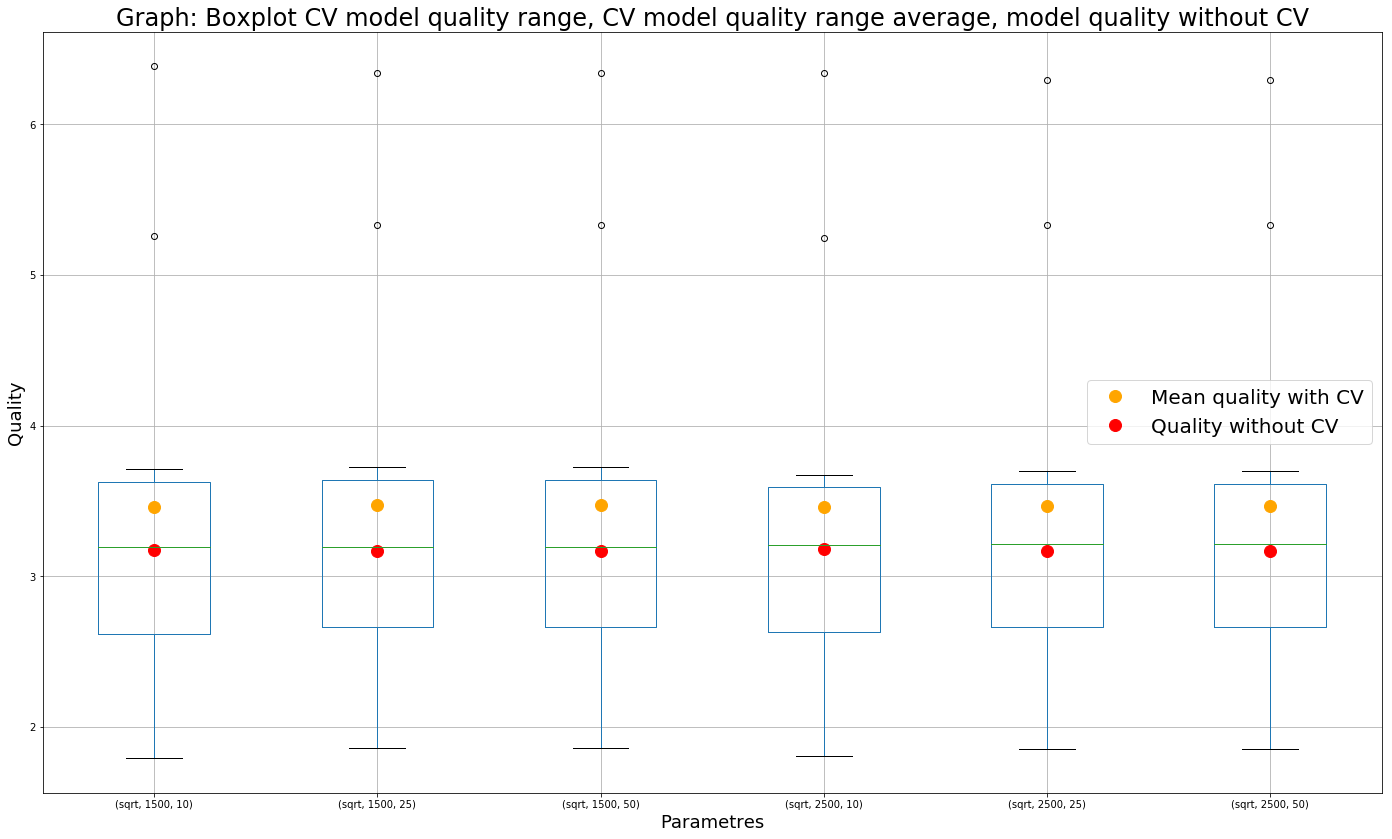

In [73]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Существенных улучшений в качестве модели при изменении параметров не случилось. 

Фиксируем результаты

In [74]:
# Заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['RF_sqrt_f'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f
0,2.927,3.536,3.132,3.075,3.671
1,2.229,2.197,2.161,2.425,3.077
2,3.903,5.188,3.851,3.731,5.246
3,4.560,2.900,3.470,3.526,3.338
4,4.522,4.930,4.849,6.035,6.344
5,3.242,2.823,2.924,3.062,2.901
6,2.990,2.326,2.649,2.963,2.323
7,4.048,3.485,4.114,4.108,3.349
8,1.743,1.753,1.743,1.648,1.809
9,3.175,2.404,3.600,3.821,2.537


In [75]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f
0,0.932,1.147,0.929,1.162,1.371


In [76]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['RF_sqrt_f'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f
0,2.665,2.779,2.716,2.876,3.166


# Linear Model

## Linear Regression

In [77]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
model = linear_model.LinearRegression()
model_fit = model.fit(x_train, y_train)
mse_test_cv = model_selection.cross_val_score(
    model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
mse_test_cv.append(round(np.mean(mse_test_cv), 3))
GBR_metrics_cv_table['Analyt_solve'] = mse_test_cv
y_predict = model_fit.predict(x_test)
mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
GBR_metrics_noncv_table['Analyt_solve'] = [mse_test_noncv]

In [78]:
GBR_metrics_cv_table

,Analyt_solve
0,5.078
1,4.416
2,5.363
3,4.235
4,7.243
5,3.112
6,2.214
7,4.088
8,2.614
9,3.608


In [79]:
GBR_metrics_noncv_table

,Analyt_solve
0,4.453


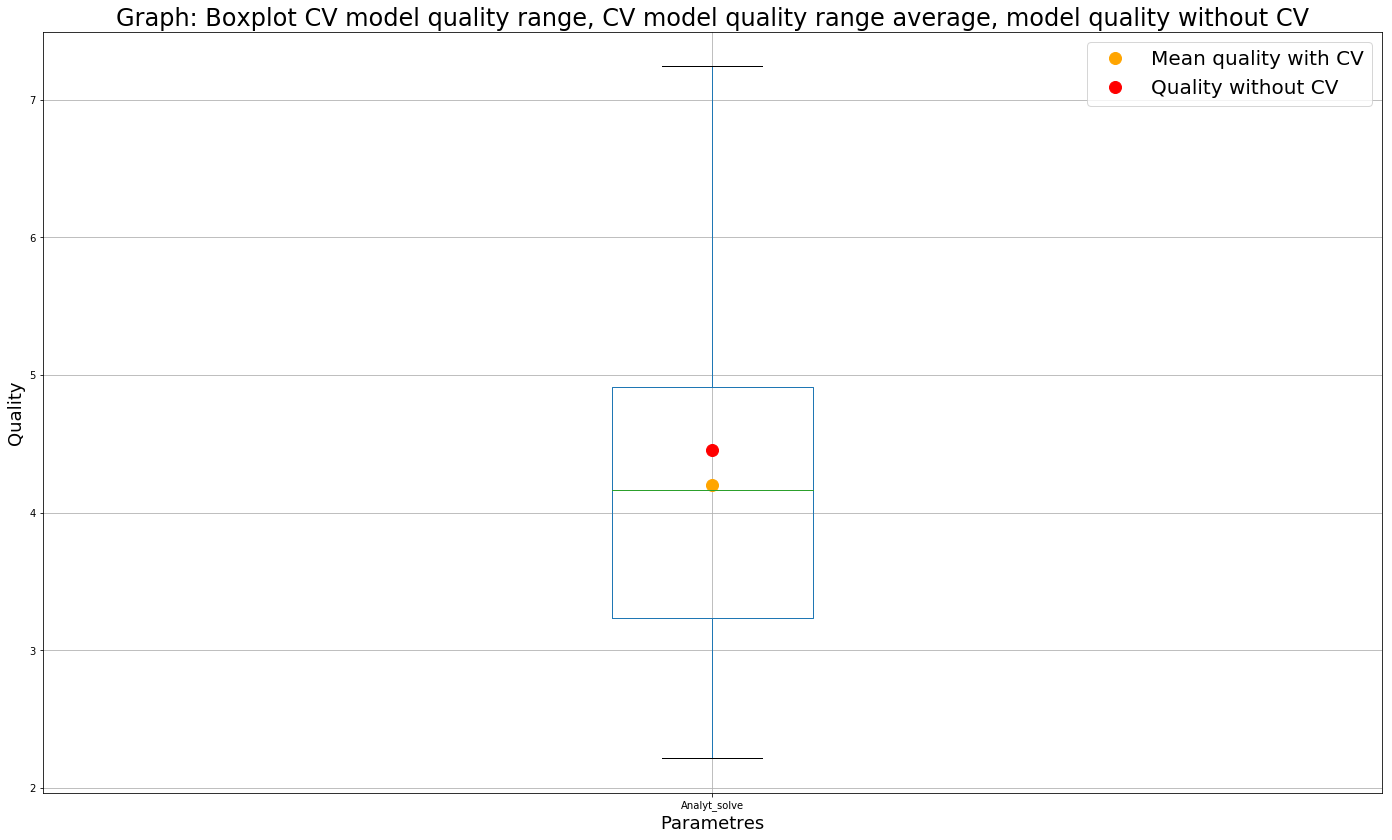

In [80]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Зафиксируем результаты

In [81]:
# Заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['Analyt_solve'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve
0,2.927,3.536,3.132,3.075,3.671,5.078
1,2.229,2.197,2.161,2.425,3.077,4.416
2,3.903,5.188,3.851,3.731,5.246,5.363
3,4.560,2.900,3.470,3.526,3.338,4.235
4,4.522,4.930,4.849,6.035,6.344,7.243
5,3.242,2.823,2.924,3.062,2.901,3.112
6,2.990,2.326,2.649,2.963,2.323,2.214
7,4.048,3.485,4.114,4.108,3.349,4.088
8,1.743,1.753,1.743,1.648,1.809,2.614
9,3.175,2.404,3.600,3.821,2.537,3.608


In [82]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve
0,0.932,1.147,0.929,1.162,1.371,1.47


In [83]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['Analyt_solve'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve
0,2.665,2.779,2.716,2.876,3.166,4.453


## Ridge
Давайте посмотрим на результаты, если использовать линейную модель с регуляризацией L2

In [84]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 5, 10]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for alpha in list_alphas:
    model = linear_model.Ridge(alpha = alpha)
    model_fit = model.fit(x_train, y_train)
    mse_test_cv = model_selection.cross_val_score(
        model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
    mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
    mse_test_cv.append(round(np.mean(mse_test_cv), 3))
    GBR_metrics_cv_table[alpha] = mse_test_cv
    y_predict = model_fit.predict(x_test)
    mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
    GBR_metrics_noncv_table[alpha] = [mse_test_noncv]

In [85]:
GBR_metrics_cv_table

,0.0001,0.001,0.01,0.1,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,5.0,10.0
0,5.078,5.078,5.077,5.072,5.022,5.016,5.011,5.006,5.001,4.997,4.992,4.987,4.983,4.978,4.974,4.864,4.751
1,4.416,4.416,4.415,4.407,4.329,4.320,4.312,4.305,4.297,4.289,4.281,4.274,4.266,4.259,4.252,4.074,3.898
2,5.363,5.363,5.363,5.364,5.380,5.381,5.383,5.385,5.386,5.388,5.389,5.391,5.392,5.394,5.395,5.437,5.497
3,4.235,4.235,4.234,4.226,4.156,4.149,4.142,4.136,4.129,4.123,4.117,4.111,4.105,4.099,4.093,3.964,3.862
4,7.243,7.243,7.243,7.247,7.281,7.284,7.288,7.291,7.295,7.298,7.302,7.305,7.308,7.312,7.315,7.401,7.508
5,3.112,3.112,3.112,3.115,3.143,3.146,3.149,3.152,3.155,3.158,3.160,3.163,3.166,3.169,3.172,3.248,3.352
6,2.214,2.214,2.214,2.212,2.200,2.199,2.198,2.198,2.197,2.196,2.195,2.195,2.194,2.194,2.193,2.196,2.232
7,4.088,4.088,4.087,4.085,4.066,4.064,4.063,4.061,4.059,4.057,4.056,4.054,4.052,4.051,4.049,4.014,3.995
8,2.614,2.614,2.614,2.611,2.588,2.586,2.584,2.582,2.579,2.577,2.575,2.573,2.571,2.569,2.567,2.521,2.474
9,3.608,3.608,3.608,3.612,3.646,3.649,3.652,3.655,3.658,3.661,3.664,3.667,3.670,3.672,3.675,3.720,3.711


In [86]:
GBR_metrics_noncv_table

,0.0001,0.001,0.01,0.1,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,5.0,10.0
0,4.453,4.453,4.453,4.453,4.451,4.451,4.45,4.45,4.45,4.45,4.45,4.45,4.45,4.449,4.449,4.449,4.457


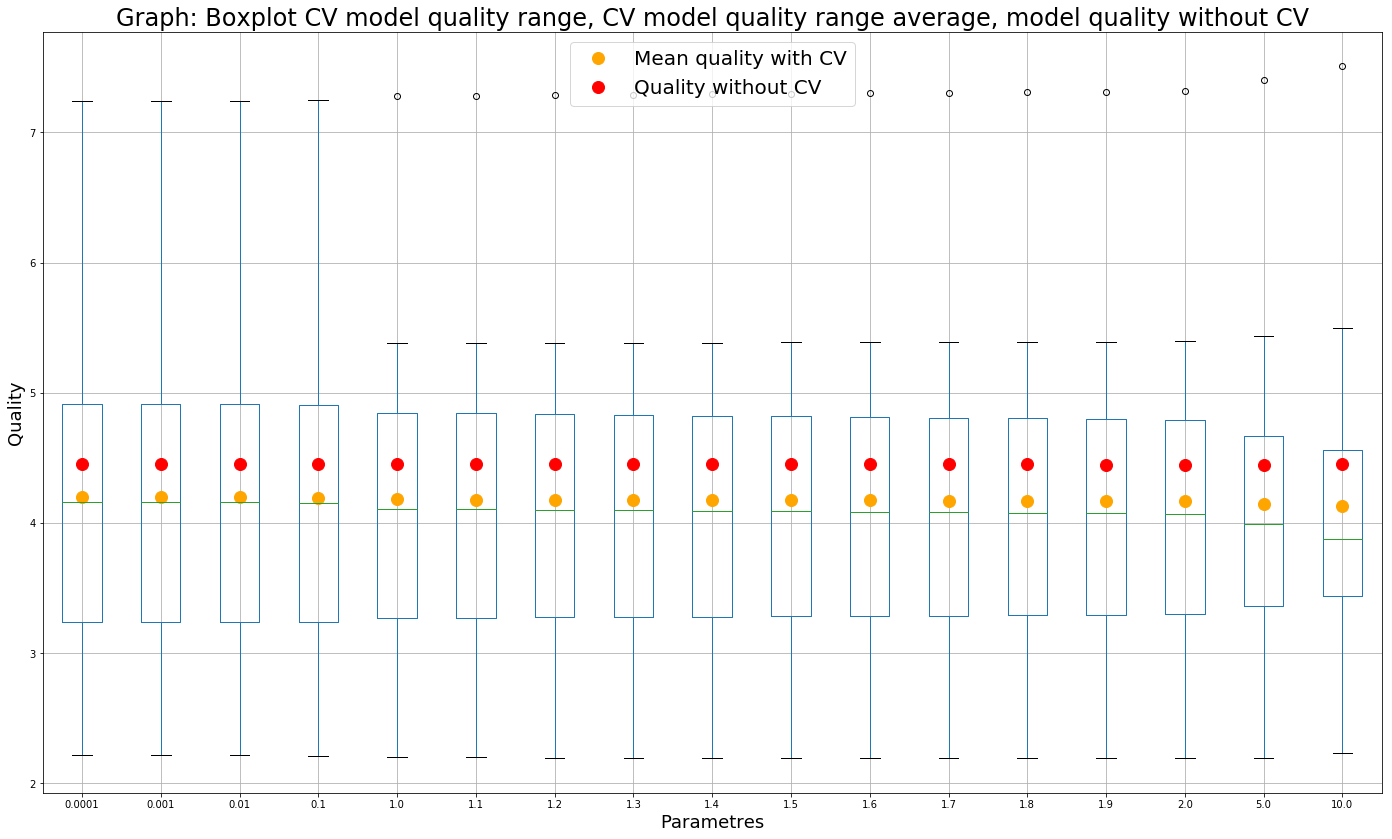

In [87]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Видно, что существует некоторый порог значения коэффициента перед регуляризацией, до которого качество модели улучшается, а после - ухудшается.

Однако, в целом результаты полученные с использованием L2 регуляризации немного лучше результатов полученных без нее.

Зафиксируем

In [88]:
# Заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['LinReg_L2'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2
0,2.927,3.536,3.132,3.075,3.671,5.078,4.751
1,2.229,2.197,2.161,2.425,3.077,4.416,3.898
2,3.903,5.188,3.851,3.731,5.246,5.363,5.497
3,4.560,2.900,3.470,3.526,3.338,4.235,3.862
4,4.522,4.930,4.849,6.035,6.344,7.243,7.508
5,3.242,2.823,2.924,3.062,2.901,3.112,3.352
6,2.990,2.326,2.649,2.963,2.323,2.214,2.232
7,4.048,3.485,4.114,4.108,3.349,4.088,3.995
8,1.743,1.753,1.743,1.648,1.809,2.614,2.474
9,3.175,2.404,3.600,3.821,2.537,3.608,3.711


In [89]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2
0,0.932,1.147,0.929,1.162,1.371,1.47,1.525


In [90]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['LinReg_L2'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2
0,2.665,2.779,2.716,2.876,3.166,4.453,4.449


## Lasso
Давайте посмотрим на результаты, если использовать линейную модель с регуляризацией L1

In [91]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 5, 10]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for alpha in list_alphas:
    model = linear_model.Lasso(alpha = alpha)
    model_fit = model.fit(x_train, y_train)
    mse_test_cv = model_selection.cross_val_score(
        model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
    mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
    mse_test_cv.append(round(np.mean(mse_test_cv), 3))
    GBR_metrics_cv_table[alpha] = mse_test_cv
    y_predict = model_fit.predict(x_test)
    mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
    GBR_metrics_noncv_table[alpha] = [mse_test_noncv]

In [92]:
GBR_metrics_cv_table

,0.0001,0.001,0.01,0.1,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,5.0,10.0
0,5.078,5.074,5.045,4.788,4.074,4.032,3.990,3.950,3.910,3.872,3.834,3.796,3.760,3.725,3.691,3.637,4.366
1,4.415,4.411,4.366,3.976,4.183,4.274,4.370,4.469,4.572,4.679,4.789,4.902,5.017,5.137,5.253,8.403,10.875
2,5.363,5.365,5.390,5.617,6.794,6.881,6.972,7.065,7.162,7.261,7.362,7.466,7.573,7.682,7.793,10.615,12.625
3,4.235,4.230,4.189,3.828,3.854,3.931,4.009,4.090,4.171,4.255,4.340,4.426,4.513,4.602,4.692,7.673,9.792
4,7.243,7.247,7.290,7.844,8.276,8.247,8.222,8.199,8.178,8.161,8.146,8.134,8.125,8.118,8.114,9.034,10.890
5,3.112,3.115,3.143,3.486,4.277,4.319,4.365,4.417,4.472,4.532,4.595,4.663,4.734,4.808,4.886,7.382,9.530
6,2.214,2.213,2.206,2.256,3.338,3.503,3.682,3.871,4.070,4.277,4.447,4.611,4.692,4.774,4.858,7.530,9.580
7,4.088,4.087,4.080,4.057,4.871,5.024,5.181,5.341,5.504,5.671,5.840,6.011,6.184,6.360,6.534,9.734,12.027
8,2.614,2.613,2.606,2.573,2.123,2.122,2.125,2.130,2.138,2.149,2.163,2.180,2.199,2.221,2.245,3.864,5.862
9,3.609,3.616,3.699,4.784,4.297,4.304,4.315,4.330,4.350,4.374,4.402,4.434,4.470,4.511,4.554,6.216,7.595


In [93]:
GBR_metrics_noncv_table

,0.0001,0.001,0.01,0.1,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,5.0,10.0
0,4.453,4.453,4.452,4.562,5.467,5.524,5.583,5.645,5.708,5.774,5.842,5.911,5.983,6.056,6.131,8.507,9.595


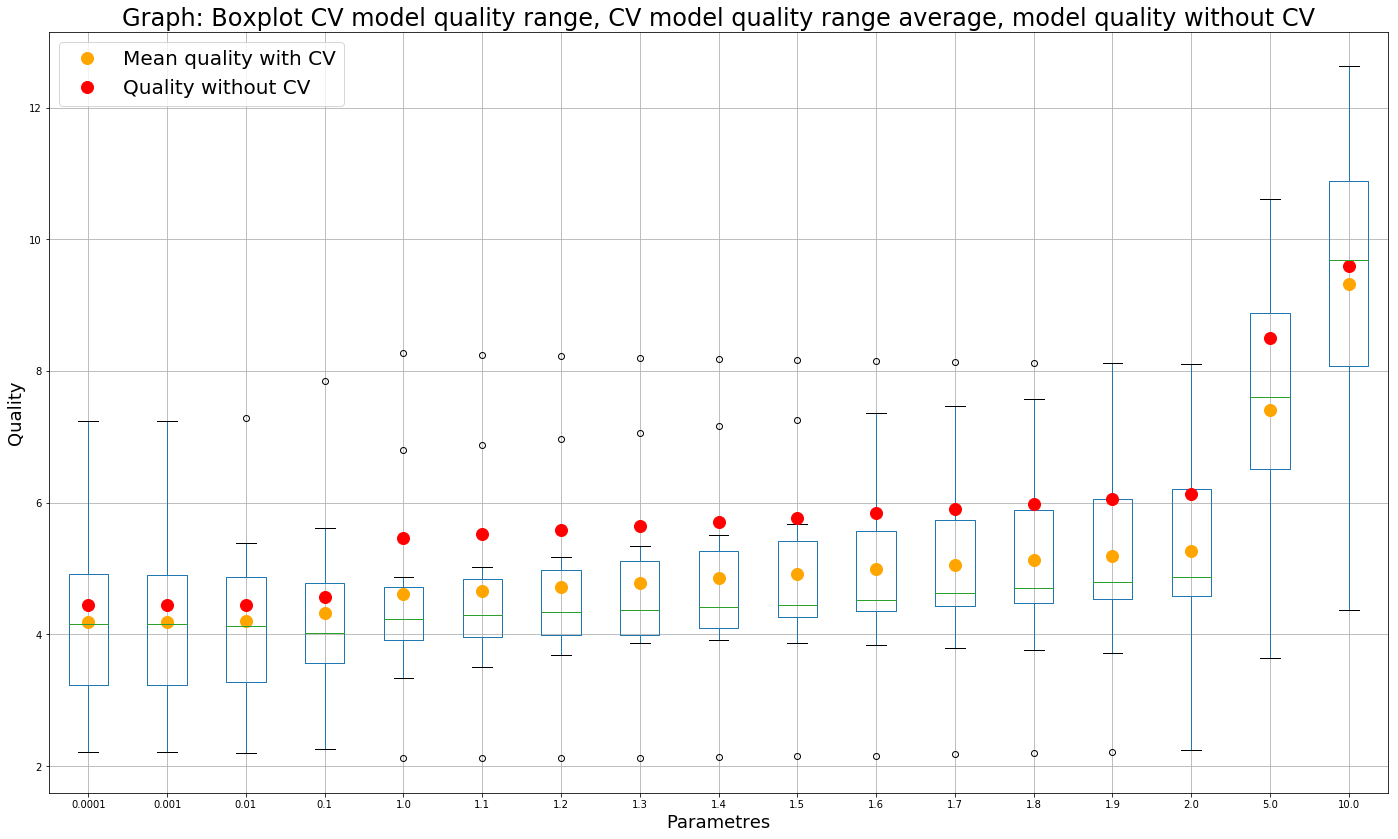

In [94]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Lasso показывает на данном датасете результаты значительно ниже Ridge и более того, с увеличением коэффициента перед регуляризатором Lasso качество стабильно снижается.

Давайте посмотрим на весовые коэффициенты регрессии при последнем коэффициенте регуляризатора

In [95]:
print round(model_fit.intercept_,3)
print map(lambda x: round(x, 3), model_fit.coef_)

22.34
[-0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0]


Мы наблюдаем обнуление большинства коэффициентов. Наибольший вес имеет последний коэффициент, перед признаком LSTAT (процент населения с низким статусом). Этот признак имеет ярко выраженную линейную зависимость. В этом и есть причина. Другими словами, наши линейные модели могут использовать только этот признак и будут выдавать сопоставимое качество.

Фиксируем результаты.

In [96]:
# Заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['LinReg_L1'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1
0,2.927,3.536,3.132,3.075,3.671,5.078,4.751,5.078
1,2.229,2.197,2.161,2.425,3.077,4.416,3.898,4.415
2,3.903,5.188,3.851,3.731,5.246,5.363,5.497,5.363
3,4.560,2.900,3.470,3.526,3.338,4.235,3.862,4.235
4,4.522,4.930,4.849,6.035,6.344,7.243,7.508,7.243
5,3.242,2.823,2.924,3.062,2.901,3.112,3.352,3.112
6,2.990,2.326,2.649,2.963,2.323,2.214,2.232,2.214
7,4.048,3.485,4.114,4.108,3.349,4.088,3.995,4.088
8,1.743,1.753,1.743,1.648,1.809,2.614,2.474,2.614
9,3.175,2.404,3.600,3.821,2.537,3.608,3.711,3.609


In [97]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1
0,0.932,1.147,0.929,1.162,1.371,1.47,1.525,1.47


In [98]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['LinReg_L1'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1
0,2.665,2.779,2.716,2.876,3.166,4.453,4.449,4.452


## ElasticNet
Давайте посмотрим на результаты, если использовать линейную модель с регуляризацией L1 и L2 одновременно

In [118]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_alphas = [0.0001, 0.1, 1, 1.5, 2.0]
list_l1_ratio = [0.0001, 0.01, 1]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for alpha in list_alphas:
    for ratio in list_l1_ratio:
        model = linear_model.ElasticNet(alpha = alpha, l1_ratio = ratio)
        model_fit = model.fit(x_train, y_train)
        mse_test_cv = model_selection.cross_val_score(
            model_fit, x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
        mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
        mse_test_cv.append(round(np.mean(mse_test_cv), 3))
        GBR_metrics_cv_table[alpha, ratio] = mse_test_cv
        y_predict = model_fit.predict(x_test)
        mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
        GBR_metrics_noncv_table[alpha, ratio] = [mse_test_noncv]

In [119]:
GBR_metrics_cv_table

,"(0.0001, 0.0001)","(0.0001, 0.01)","(0.0001, 1)","(0.1, 0.0001)","(0.1, 0.01)","(0.1, 1)","(1, 0.0001)","(1, 0.01)","(1, 1)","(1.5, 0.0001)","(1.5, 0.01)","(1.5, 1)","(2.0, 0.0001)","(2.0, 0.01)","(2.0, 1)"
0,5.077,5.077,5.078,4.700,4.700,4.788,4.596,4.590,4.074,4.589,4.583,3.872,4.567,4.560,3.691
1,4.415,4.415,4.415,3.834,3.834,3.976,5.434,5.425,4.183,6.129,6.122,4.679,6.640,6.635,5.253
2,5.363,5.363,5.363,5.539,5.540,5.617,6.918,6.916,6.794,7.496,7.499,7.261,7.957,7.962,7.793
3,4.234,4.234,4.235,3.835,3.834,3.828,5.084,5.077,3.854,5.615,5.609,4.255,6.018,6.013,4.692
4,7.243,7.243,7.243,7.569,7.570,7.844,8.322,8.324,8.276,8.553,8.554,8.161,8.737,8.739,8.114
5,3.112,3.112,3.112,3.416,3.417,3.486,4.707,4.704,4.277,5.207,5.204,4.532,5.602,5.601,4.886
6,2.214,2.214,2.214,2.270,2.269,2.256,3.797,3.793,3.338,4.397,4.394,4.277,4.864,4.864,4.858
7,4.087,4.087,4.088,3.999,4.000,4.057,5.619,5.615,4.871,6.366,6.365,5.671,6.946,6.947,6.534
8,2.613,2.613,2.614,2.453,2.454,2.573,2.708,2.703,2.123,2.910,2.904,2.149,3.087,3.082,2.245
9,3.609,3.609,3.609,3.673,3.680,4.784,3.247,3.252,4.297,3.519,3.524,4.374,3.801,3.806,4.554


In [120]:
GBR_metrics_noncv_table

,"(0.0001, 0.0001)","(0.0001, 0.01)","(0.0001, 1)","(0.1, 0.0001)","(0.1, 0.01)","(0.1, 1)","(1, 0.0001)","(1, 0.01)","(1, 1)","(1.5, 0.0001)","(1.5, 0.01)","(1.5, 1)","(2.0, 0.0001)","(2.0, 0.01)","(2.0, 1)"
0,4.453,4.453,4.453,4.553,4.552,4.562,5.747,5.745,5.467,6.154,6.153,5.774,6.461,6.462,6.131


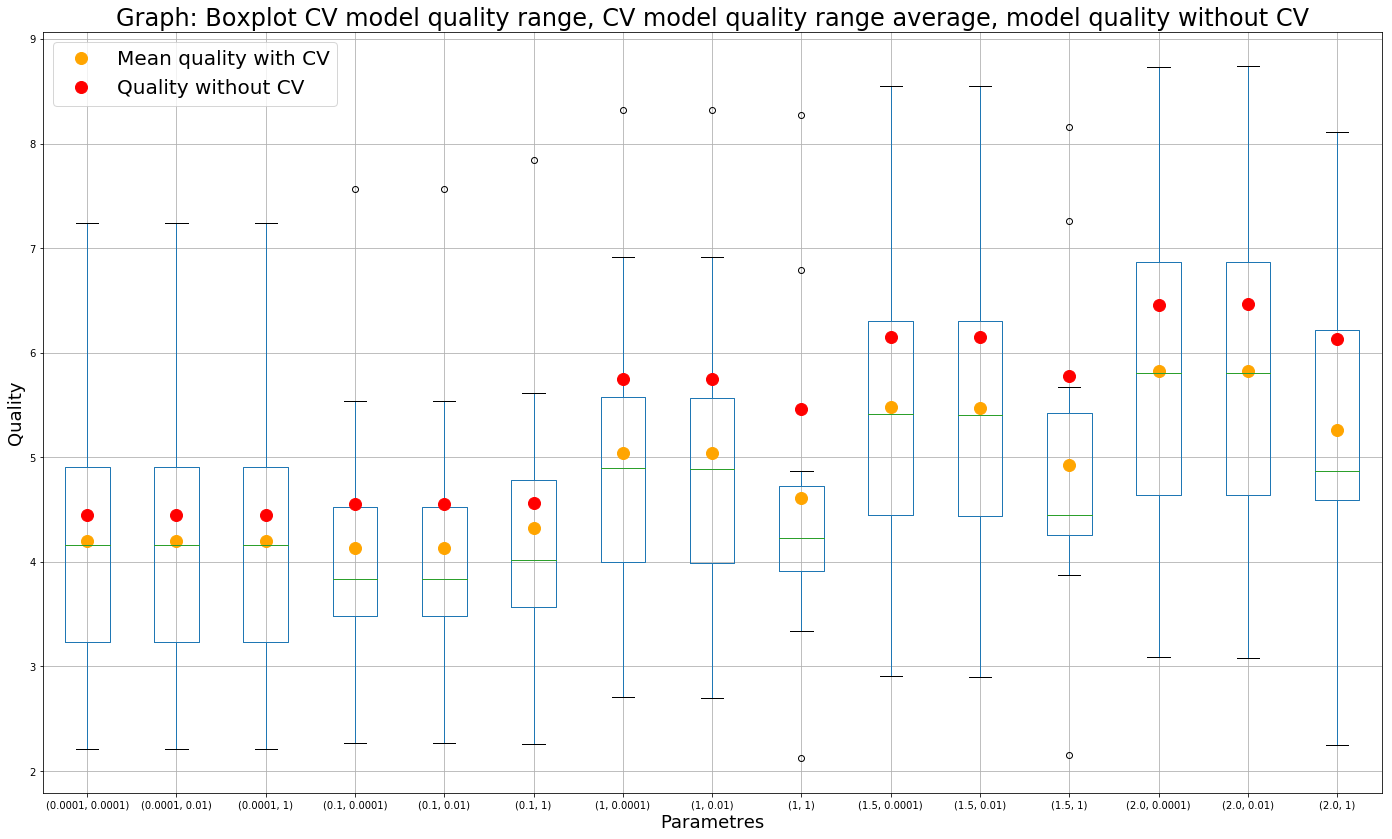

In [121]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

In [123]:
# Заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['LinReg_Elastic'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1,LinReg_Elastic
0,2.927,3.536,3.132,3.075,3.671,5.078,4.751,5.078,4.700
1,2.229,2.197,2.161,2.425,3.077,4.416,3.898,4.415,3.834
2,3.903,5.188,3.851,3.731,5.246,5.363,5.497,5.363,5.539
3,4.560,2.900,3.470,3.526,3.338,4.235,3.862,4.235,3.835
4,4.522,4.930,4.849,6.035,6.344,7.243,7.508,7.243,7.569
5,3.242,2.823,2.924,3.062,2.901,3.112,3.352,3.112,3.416
6,2.990,2.326,2.649,2.963,2.323,2.214,2.232,2.214,2.270
7,4.048,3.485,4.114,4.108,3.349,4.088,3.995,4.088,3.999
8,1.743,1.753,1.743,1.648,1.809,2.614,2.474,2.614,2.453
9,3.175,2.404,3.600,3.821,2.537,3.608,3.711,3.609,3.673


In [124]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1,LinReg_Elastic
0,0.932,1.147,0.929,1.162,1.371,1.47,1.525,1.47,1.539


In [125]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['LinReg_Elastic'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1,LinReg_Elastic
0,2.665,2.779,2.716,2.876,3.166,4.453,4.449,4.452,4.453


# Линейные модели на полиномиальных признаках
Давайте преобразуем признаковое пространство, добавив туда полиномов и посмотрим как изменится качество

Изначальное предположение - качество может улучшиться

Будем проверять качество следующих моделей:

- Ridge
- Lasso

## Ridge polynomial features

In [126]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_poly = [2, 3, 4]
list_alphas = [0.001, 0.01, 0.1, 1, 1.5, 2.0, 5, 10]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for poly in list_poly:
    for alpha in list_alphas:
        poly_model = preprocessing.PolynomialFeatures(poly)
        poly_x_train = poly_model.fit_transform(x_train) 
        poly_x_test = poly_model.fit_transform(x_test)
        model = linear_model.Ridge(alpha = alpha)
        model_fit = model.fit(poly_x_train, y_train)
        mse_test_cv = model_selection.cross_val_score(
            model_fit, poly_x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
        mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
        mse_test_cv.append(round(np.mean(mse_test_cv), 3))
        GBR_metrics_cv_table[poly, alpha] = mse_test_cv
        y_predict = model_fit.predict(poly_x_test)
        mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
        GBR_metrics_noncv_table[poly, alpha] = [mse_test_noncv]

In [127]:
GBR_metrics_cv_table

,"(2, 0.001)","(2, 0.01)","(2, 0.1)","(2, 1)","(2, 1.5)","(2, 2.0)","(2, 5)","(2, 10)","(3, 0.001)","(3, 0.01)",...,"(3, 5)","(3, 10)","(4, 0.001)","(4, 0.01)","(4, 0.1)","(4, 1)","(4, 1.5)","(4, 2.0)","(4, 5)","(4, 10)"
0,5.369,5.325,4.678,3.949,3.898,3.872,3.826,3.831,5.620,5.330,...,3.848,3.792,4.121,4.113,4.062,3.960,3.949,3.947,3.983,4.040
1,5.207,4.519,3.608,2.720,2.611,2.586,2.690,2.781,8.701,8.489,...,3.421,3.270,9.353,9.310,9.010,8.168,7.975,7.846,7.524,7.324
2,8.033,7.751,6.895,5.522,5.307,5.171,4.847,4.722,16.401,15.955,...,10.335,8.967,13.451,13.405,13.159,13.307,13.418,13.489,13.548,13.306
3,11.769,7.418,4.269,4.036,4.053,4.067,4.142,4.244,11.554,11.383,...,3.618,3.394,7.715,7.661,7.257,6.113,5.861,5.668,4.983,4.498
4,9.473,7.091,5.334,5.296,5.207,5.140,4.988,5.000,8.880,7.969,...,5.059,4.659,6.938,6.909,6.737,6.425,6.337,6.278,6.166,6.154
5,5.183,4.640,3.904,3.094,3.003,2.956,2.897,2.916,10.950,11.156,...,4.619,4.045,9.582,9.547,9.290,8.427,8.173,7.967,7.160,6.430
6,6.187,5.479,5.724,5.350,4.886,4.508,3.253,2.554,14.625,14.433,...,6.749,5.803,8.931,8.946,9.110,10.360,10.777,11.074,11.711,11.572
7,6.686,6.391,5.492,4.686,4.442,4.265,3.775,3.574,11.079,10.358,...,4.460,4.025,8.081,8.066,7.936,7.231,6.976,6.763,5.900,5.136
8,4.737,3.473,2.587,1.848,1.790,1.760,1.736,1.809,8.464,7.937,...,2.658,2.499,4.767,4.730,4.457,3.857,3.770,3.714,3.572,3.517
9,28.827,26.390,17.824,4.913,3.857,3.412,2.950,3.055,210.121,199.636,...,24.789,15.934,248.974,248.044,239.458,180.951,158.818,140.814,75.665,27.457


In [128]:
GBR_metrics_noncv_table

,"(2, 0.001)","(2, 0.01)","(2, 0.1)","(2, 1)","(2, 1.5)","(2, 2.0)","(2, 5)","(2, 10)","(3, 0.001)","(3, 0.01)",...,"(3, 5)","(3, 10)","(4, 0.001)","(4, 0.01)","(4, 0.1)","(4, 1)","(4, 1.5)","(4, 2.0)","(4, 5)","(4, 10)"
0,4.241,4.248,4.235,3.943,3.829,3.739,3.426,3.201,26.587,21.364,...,4.411,4.003,10.963,10.023,9.09,6.519,6.125,5.819,4.991,4.701


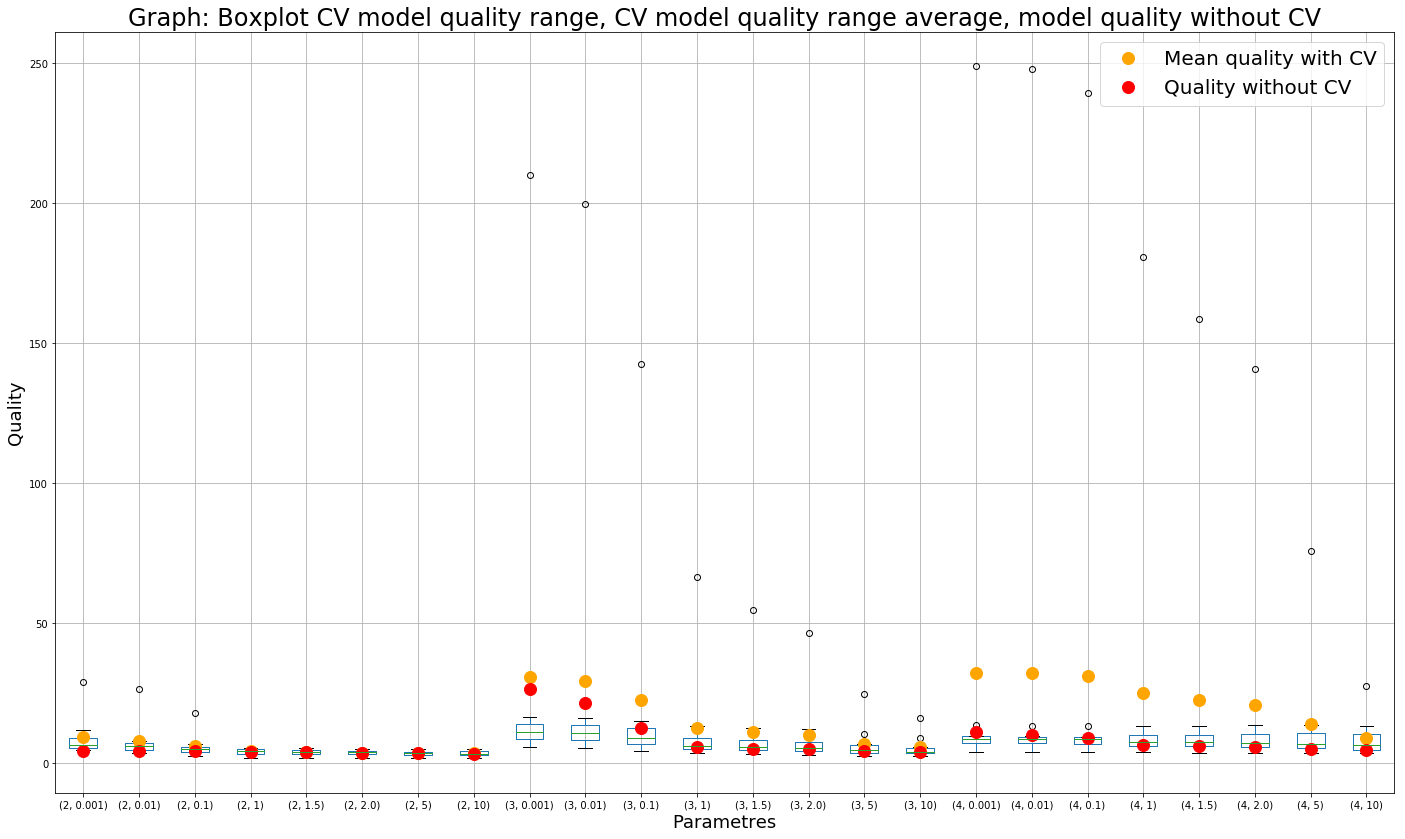

In [129]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Добавление полинома 2-й степени действительно улучшило результаты качества модели. Однако дальнейшее увеличение полинома приводит к существенному снижению качества. Давайте откорректируем поиск лучшей модели: зафиксируем степень полинома равной 2, и будем менять только коэффициент alpha.

In [130]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_poly = [2]
list_alphas = [0.001, 0.01, 0.1, 1, 1.5, 2.0, 5, 10, 20, 50]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for poly in list_poly:
    for alpha in list_alphas:
        poly_model = preprocessing.PolynomialFeatures(poly)
        poly_x_train = poly_model.fit_transform(x_train) 
        poly_x_test = poly_model.fit_transform(x_test)
        model = linear_model.Ridge(alpha = alpha)
        model_fit = model.fit(poly_x_train, y_train)
        mse_test_cv = model_selection.cross_val_score(
            model_fit, poly_x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
        mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
        mse_test_cv.append(round(np.mean(mse_test_cv), 3))
        GBR_metrics_cv_table[poly, alpha] = mse_test_cv
        y_predict = model_fit.predict(poly_x_test)
        mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
        GBR_metrics_noncv_table[poly, alpha] = [mse_test_noncv]

In [131]:
GBR_metrics_cv_table

,"(2, 0.001)","(2, 0.01)","(2, 0.1)","(2, 1)","(2, 1.5)","(2, 2.0)","(2, 5)","(2, 10)","(2, 20)","(2, 50)"
0,5.369,5.325,4.678,3.949,3.898,3.872,3.826,3.831,3.895,4.118
1,5.207,4.519,3.608,2.720,2.611,2.586,2.690,2.781,2.860,3.075
2,8.033,7.751,6.895,5.522,5.307,5.171,4.847,4.722,4.705,4.848
3,11.769,7.418,4.269,4.036,4.053,4.067,4.142,4.244,4.398,4.697
4,9.473,7.091,5.334,5.296,5.207,5.140,4.988,5.000,5.145,5.570
5,5.183,4.640,3.904,3.094,3.003,2.956,2.897,2.916,2.958,3.025
6,6.187,5.479,5.724,5.350,4.886,4.508,3.253,2.554,2.219,2.182
7,6.686,6.391,5.492,4.686,4.442,4.265,3.775,3.574,3.561,3.808
8,4.737,3.473,2.587,1.848,1.790,1.760,1.736,1.809,1.997,2.476
9,28.827,26.390,17.824,4.913,3.857,3.412,2.950,3.055,3.608,4.534


In [133]:
GBR_metrics_noncv_table

,"(2, 0.001)","(2, 0.01)","(2, 0.1)","(2, 1)","(2, 1.5)","(2, 2.0)","(2, 5)","(2, 10)","(2, 20)","(2, 50)"
0,4.241,4.248,4.235,3.943,3.829,3.739,3.426,3.201,3.024,2.944


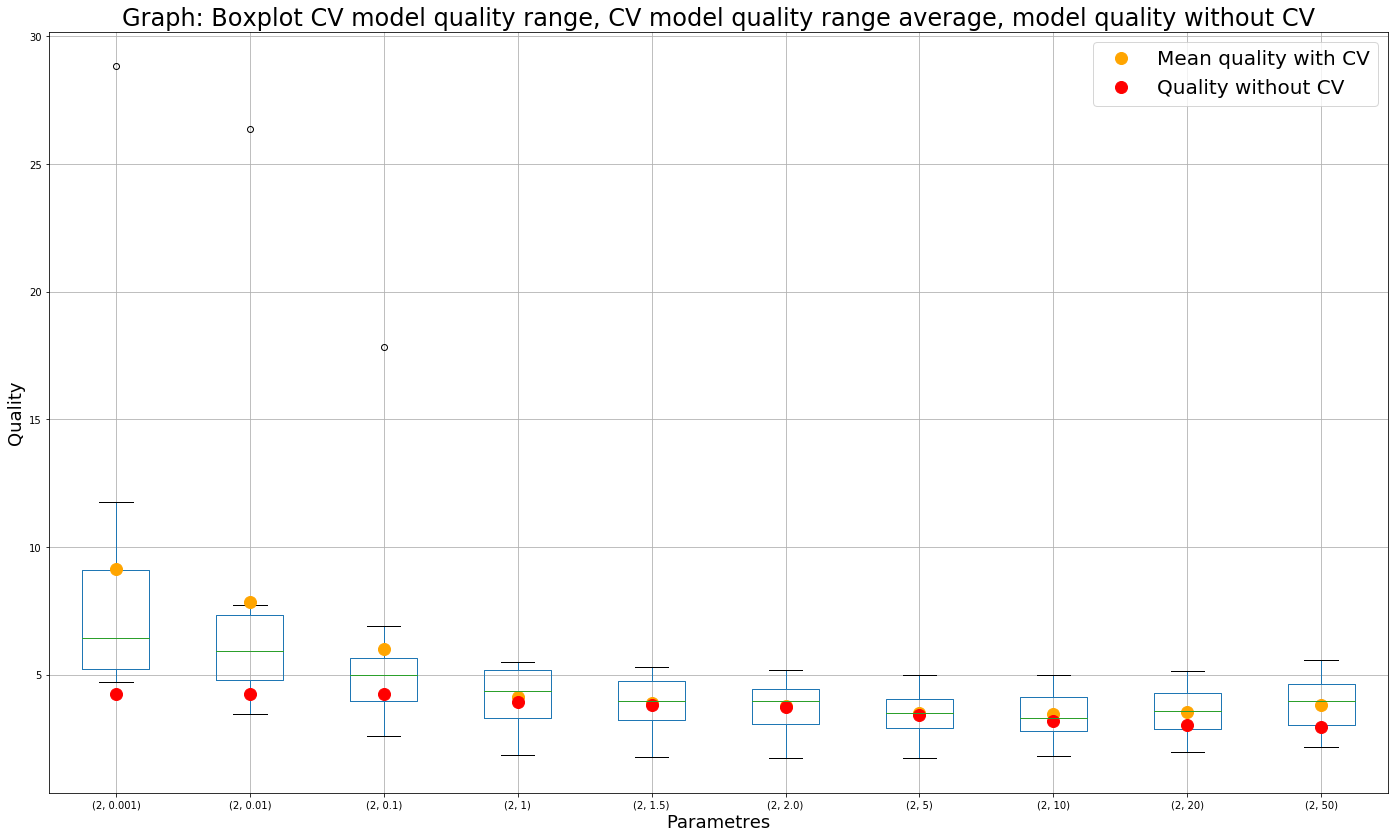

In [134]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

При увеличении коэффициента регуляризации мы наблюдаем до определенного порога увеличение качества модели и также снижение дисперсии. Наилучшие показатели лежат между значениями alpha равными 5 и 20.

Фиксируем результаты

In [135]:
# Заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['LinReg_Poly2_L2'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1,LinReg_Elastic,LinReg_Poly2_L2
0,2.927,3.536,3.132,3.075,3.671,5.078,4.751,5.078,4.700,3.831
1,2.229,2.197,2.161,2.425,3.077,4.416,3.898,4.415,3.834,2.781
2,3.903,5.188,3.851,3.731,5.246,5.363,5.497,5.363,5.539,4.722
3,4.560,2.900,3.470,3.526,3.338,4.235,3.862,4.235,3.835,4.244
4,4.522,4.930,4.849,6.035,6.344,7.243,7.508,7.243,7.569,5.000
5,3.242,2.823,2.924,3.062,2.901,3.112,3.352,3.112,3.416,2.916
6,2.990,2.326,2.649,2.963,2.323,2.214,2.232,2.214,2.270,2.554
7,4.048,3.485,4.114,4.108,3.349,4.088,3.995,4.088,3.999,3.574
8,1.743,1.753,1.743,1.648,1.809,2.614,2.474,2.614,2.453,1.809
9,3.175,2.404,3.600,3.821,2.537,3.608,3.711,3.609,3.673,3.055


In [136]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1,LinReg_Elastic,LinReg_Poly2_L2
0,0.932,1.147,0.929,1.162,1.371,1.47,1.525,1.47,1.539,1.011


In [137]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['LinReg_Poly2_L2'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1,LinReg_Elastic,LinReg_Poly2_L2
0,2.665,2.779,2.716,2.876,3.166,4.453,4.449,4.452,4.453,2.944


## Lasso polynomial features

In [138]:
# сформируем пустые таблицы pandas
# таблица для фиксирования результатов оценки качества при кросс-валидации
GBR_metrics_noncv_table = pd.DataFrame()
# таблица для фиксирования результатов оценки качества на тестовой выборке без применения кросс-валидации
GBR_metrics_cv_table = pd.DataFrame()

# укажем значения параметров модели
# укажем количество признаков к анализу
list_poly = [2, 3]
list_alphas = [0.001, 0.01, 0.1, 1, 1.5, 2.0, 5, 10]

# запустим цикл определения и фиксации показателя качества модели в зависимости от параметра
for poly in list_poly:
    for alpha in list_alphas:
        poly_model = preprocessing.PolynomialFeatures(poly)
        poly_x_train = poly_model.fit_transform(x_train) 
        poly_x_test = poly_model.fit_transform(x_test)
        model = linear_model.Lasso(alpha = alpha)
        model_fit = model.fit(poly_x_train, y_train)
        mse_test_cv = model_selection.cross_val_score(
            model_fit, poly_x_test, y_test, scoring = 'neg_mean_squared_error', cv = cv)
        mse_test_cv = map(lambda x: round((-x)**0.5, 3), mse_test_cv)
        mse_test_cv.append(round(np.mean(mse_test_cv), 3))
        GBR_metrics_cv_table[poly, alpha] = mse_test_cv
        y_predict = model_fit.predict(poly_x_test)
        mse_test_noncv = round((metrics.mean_squared_error(y_test, y_predict))**0.5,3)
        GBR_metrics_noncv_table[poly, alpha] = [mse_test_noncv]

C:\Users\Alexander\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [139]:
GBR_metrics_cv_table

,"(2, 0.001)","(2, 0.01)","(2, 0.1)","(2, 1)","(2, 1.5)","(2, 2.0)","(2, 5)","(2, 10)","(3, 0.001)","(3, 0.01)","(3, 0.1)","(3, 1)","(3, 1.5)","(3, 2.0)","(3, 5)","(3, 10)"
0,4.875,4.671,3.875,3.152,2.965,2.903,3.577,4.269,5.522,3.984,3.643,3.352,3.574,3.670,4.193,4.217
1,3.953,3.123,2.816,3.243,3.558,3.869,7.214,10.477,8.780,6.358,3.348,4.110,4.637,4.728,5.796,6.640
2,6.569,4.675,4.180,5.267,6.094,6.859,10.404,12.201,17.549,11.700,5.110,4.837,5.875,6.494,8.461,9.472
3,4.571,3.819,3.799,3.352,3.859,4.314,7.489,9.297,8.608,5.448,3.156,4.833,4.330,4.412,6.177,7.167
4,7.109,4.844,6.019,7.302,7.275,7.318,9.179,10.546,5.664,4.617,4.775,6.838,7.745,8.276,8.796,8.876
5,4.265,2.824,3.099,3.225,3.320,3.543,5.919,9.066,10.296,4.425,3.579,5.093,5.415,5.433,5.622,5.806
6,5.731,5.126,2.286,2.102,2.538,2.999,6.202,9.039,10.498,6.205,2.332,2.497,2.983,3.106,4.123,5.411
7,4.644,4.101,3.679,4.594,4.979,5.398,8.603,11.601,6.902,4.898,4.053,5.134,5.818,6.089,7.865,8.598
8,2.920,2.239,1.712,2.697,2.822,2.983,5.041,6.033,7.286,2.713,2.030,2.502,3.272,3.762,5.265,5.231
9,18.075,2.984,3.602,3.917,4.104,4.211,5.594,7.192,138.720,8.368,3.088,3.822,3.971,4.226,5.340,5.996


In [140]:
GBR_metrics_noncv_table

,"(2, 0.001)","(2, 0.01)","(2, 0.1)","(2, 1)","(2, 1.5)","(2, 2.0)","(2, 5)","(2, 10)","(3, 0.001)","(3, 0.01)","(3, 0.1)","(3, 1)","(3, 1.5)","(3, 2.0)","(3, 5)","(3, 10)"
0,4.288,3.57,2.932,4.16,4.542,5.01,8.184,9.558,7.264,4.409,3.271,3.957,4.345,4.714,6.615,7.824


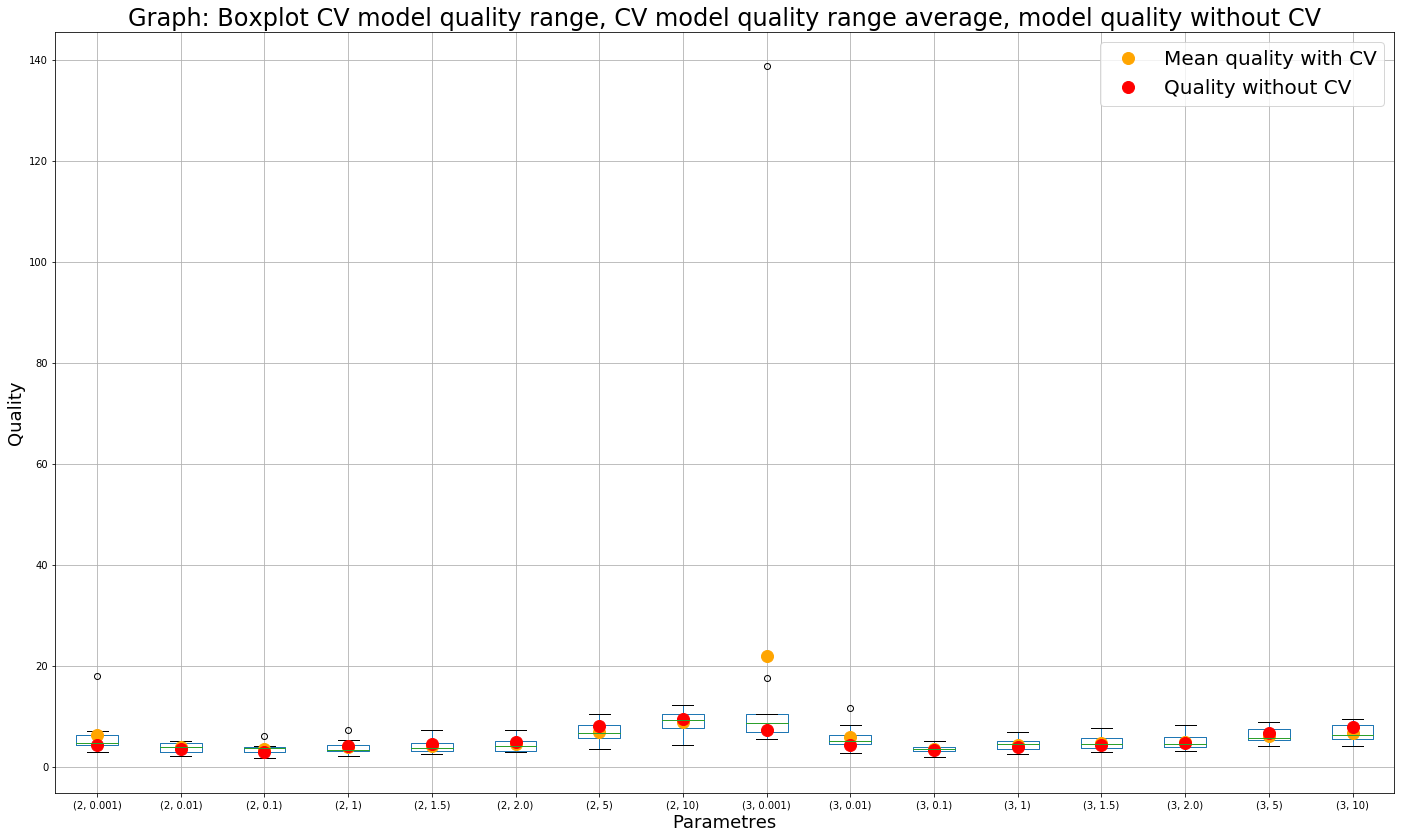

In [141]:
graph_for_quality(GBR_metrics_cv_table, GBR_metrics_noncv_table)

Мы наблюдаем, что при кросс-валидации, качество модели Lasso в целом ниже чем Ridge, но некоторые подвыборки показывают очень хороший результат, большинство - приемлемый результат и только несколько, как правило не более одной подвыборки очень плохой результат. 

На тестовой выборке качество получилось значительно лучше чем Ridge, оно сопоставимо с качеством лучших моделей решающих деревьев.

Это косвенно указывает на необходимость кластеризации данных перед анализом. Фиксируем результаты.

In [142]:
# Заполним таблицу для результатов с применением кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_cv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_cv_table[min_gbr])).reshape(cv+1)

# создадим в таблице столбец
best_models_table_cv['LinReg_Poly2_L1'] = best_GBR
# посмотрим на таблицу
best_models_table_cv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1,LinReg_Elastic,LinReg_Poly2_L2,LinReg_Poly2_L1
0,2.927,3.536,3.132,3.075,3.671,5.078,4.751,5.078,4.700,3.831,3.875
1,2.229,2.197,2.161,2.425,3.077,4.416,3.898,4.415,3.834,2.781,2.816
2,3.903,5.188,3.851,3.731,5.246,5.363,5.497,5.363,5.539,4.722,4.180
3,4.560,2.900,3.470,3.526,3.338,4.235,3.862,4.235,3.835,4.244,3.799
4,4.522,4.930,4.849,6.035,6.344,7.243,7.508,7.243,7.569,5.000,6.019
5,3.242,2.823,2.924,3.062,2.901,3.112,3.352,3.112,3.416,2.916,3.099
6,2.990,2.326,2.649,2.963,2.323,2.214,2.232,2.214,2.270,2.554,2.286
7,4.048,3.485,4.114,4.108,3.349,4.088,3.995,4.088,3.999,3.574,3.679
8,1.743,1.753,1.743,1.648,1.809,2.614,2.474,2.614,2.453,1.809,1.712
9,3.175,2.404,3.600,3.821,2.537,3.608,3.711,3.609,3.673,3.055,3.602


In [143]:
make_std_dev_table (std_dev_best_model_cv, best_models_table_cv, list(best_models_table_cv)[-1])

Стандартное отклонение оценок качества лучших моделей на кросс-валидации:


,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1,LinReg_Elastic,LinReg_Poly2_L2,LinReg_Poly2_L1
0,0.932,1.147,0.929,1.162,1.371,1.47,1.525,1.47,1.539,1.011,1.173


In [144]:
# Создадим и заполним таблицу для результатов без применения кросс-валидации
# найдем индекс минимального среднего значения результата
min_gbr = GBR_metrics_noncv_table[-1:].idxmin(axis = 1)
# по индексу выберем столбец, переведем его в формат одномерного массива numpy
best_GBR = (np.array(GBR_metrics_noncv_table[min_gbr])).reshape(1)

# создадим в таблице столбец
best_models_table_noncv['LinReg_Poly2_L1'] = best_GBR
# посмотрим на таблицу
best_models_table_noncv

,GBR,GBR_sqrt_f,GBR_stoch,RF,RF_sqrt_f,Analyt_solve,LinReg_L2,LinReg_L1,LinReg_Elastic,LinReg_Poly2_L2,LinReg_Poly2_L1
0,2.665,2.779,2.716,2.876,3.166,4.453,4.449,4.452,4.453,2.944,2.932


# Итоговое резюме
Давайте для наглядности построим график оценок качества лучших моделей по масштабированным признакам

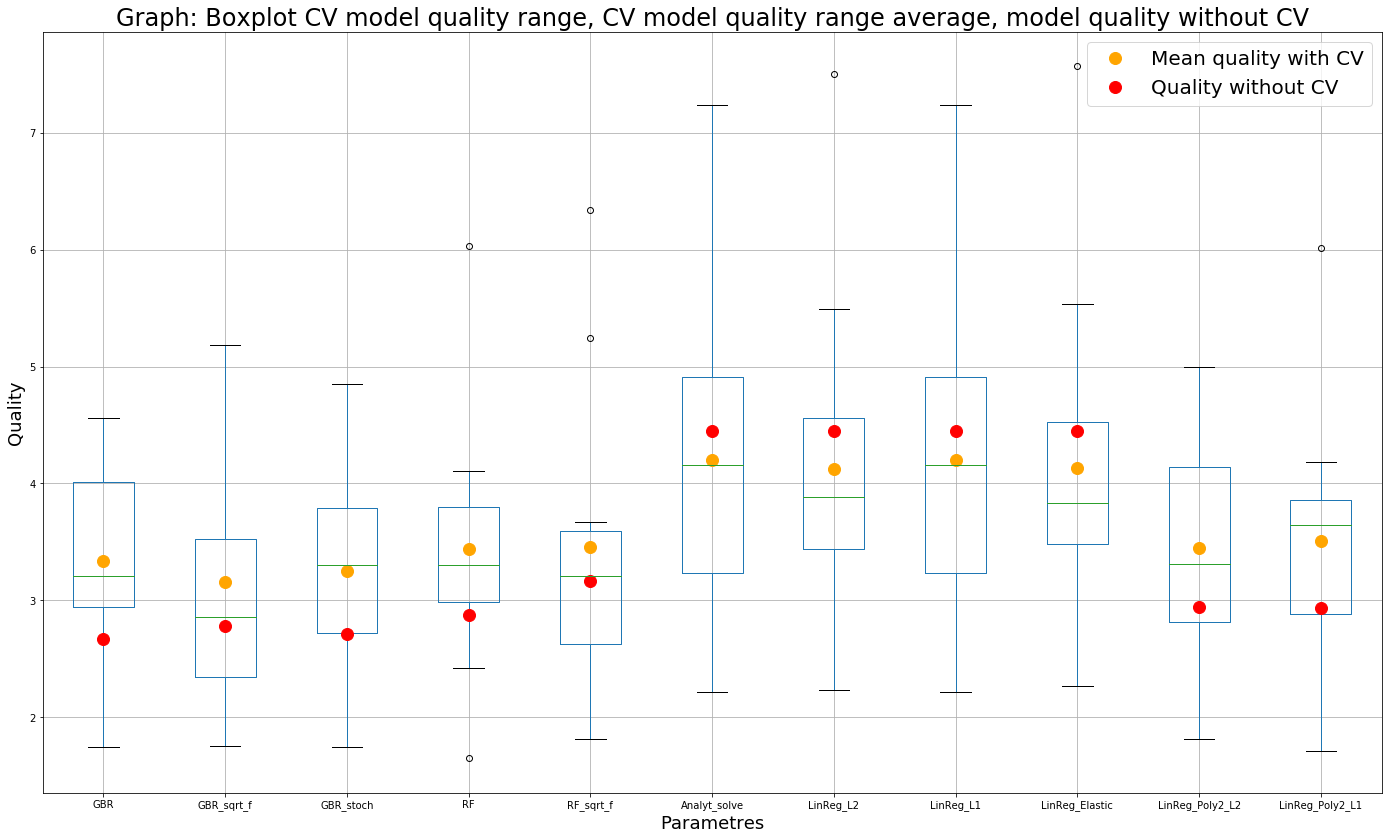

In [145]:
graph_for_quality(best_models_table_cv, best_models_table_noncv)

Чтобы не повоторяться не будем описывать лучшие модели, они в целом не поменялись.

На что стоит обратить внимание:

1) Масштабирование ощутимо улучшает качество для линейных моделей, и немного на деревьях решений.

2) В целом линейные модели проигрывают в средних значениях качества и дисперсии оценок качества решающим деревьям, но использование полиномиальных признаков позволяет существенно сократить разрыв в качестве. При этом стоит отметить, что скорость обработки на линейных моделях значительно выше.

**Задел на будущее:** написать класс для проведения исследования, чтобы не множить код и побольше функций при формировании таблиц результатов или же это тоже метод самописного класса.